## Practical project (classification)

Project task:
* Understanding and analyzing the problem represented by the data
* Initial familiarization with the presented data
* Data analysis, visualization and EDA
* Use and test different classification algorithms

The content of the task: What factors determine the willingness to stay with the current employer? Predict whether or not an employee will quit their job.

Explanation of some data:
* Education:
1 'Below College';
2 'College';
3 'Bachelor';
4 'Master';
5 'Doctor'.
* Environment Satisfaction:
1 'Low';
2 'Medium';
3 'High';
4 'Very High'.
* Job Involvement:
1 'Low';
2 'Medium';
3 'High';
4 'Very High'.
* Job Satisfaction:
1 'Low';
2 'Medium';
3 'High';
4 'Very High.
* Performance Rating:
1 'Low';
2 'Good';
3 'Excellent';
4 'Outstanding'.
* Relationship Satisfaction:
1 'Low';
2 'Medium';
3 'High';
4 'Very High'.
* Work Life Balance:
1 'Bad';
2 'Good';
3 'Better';
4 'Best'.
* Employee Count: Number of people represented by a given entry.
* Monthly Rate a Monthly income: Monthly rate is the cost of the employer in connection with the employment of an employee.
* Daily Rate: similarly.
* Attrition (our target): Information whether a given employee quit the job or not.
* STOCK OPTIONS LEVEL: What percentage of shares does / can the employee own.
* PERCENT SALARY HIKE: Percentage increase in wages over the last 2 years

A preliminary exploratory data analysis using visualisation of the data was first conducted to determine if there were any significant relationships  between the employee characteristics and  the target variable - 'Attrition'. In the second half of the analysis we had evaluated different classification algorithms in a multi-step process:
1. we choosed a short-listed set of independent variables from those who have the higher correlation coefficient with target variable;
 1.1.  splitting the dataset into a training and test set using an 70:30 ratio;
 1.2. training 7 different candidate machine learning algorithms on the training subset of the dataset;
 1.3. assessing model performance using F1 score; 
 1.4. tuning the hyperparameters; 
 1.5. making a final selection of the model:
2.  we repeated all the steps above (from 1.1. to 1.5.)  using all the independent variables of the dataframe.

The candidate machine learning algorithms used:
* Ada Boost Classifier
* Decision tree
* K-Nearest neighbours (KNN)
* Logistic regression
* Gaussian naive Bayes
* Random forest
* Support vector machine (SVM)

# Conclusions:

* Target - feature variable relationships: we did not found a statistically significant relationship between the 'Attrition' target feature and the other employee characteristics from data set. The higher correlation coefficient was beetwen 'Attrition' and StockOptionLevel - 0.086387;
* In order to predict whether or not an employee will quit their job the best classification model algorithm to use is Ada Boost Classifier with an f1 score of  0.561798.

# Importing the packages we will use and loading datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
!{sys.executable} -m pip install optuna
import optuna
from datetime import datetime
from sklearn.preprocessing import KBinsDiscretizer, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import neighbors
from sklearn import naive_bayes
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix, f1_score, roc_curve, roc_auc_score
import warnings
warnings.filterwarnings('ignore')


[notice] A new release of pip available: 22.1.2 -> 22.3.1
[notice] To update, run: C:\Users\valen\Envs\curs_python\Scripts\python.exe -m pip install --upgrade pip


In [2]:
df_attition = pd.read_csv('attrition.csv')
df_attition.sample(5)

,EmployeeNumber,Attrition
441,1255,No
2292,5823,Yes
1049,616,No
1488,5019,Yes
1433,100110,NaN


In [3]:
df1 = pd.read_csv('df1.csv')
df1.sample(5)

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked
3924,7455,29.0,Travel_Rarely,1247.0,Sales,20.0,2.0,Marketing,1.0,4.0,Male,45.0,3.0,2.0,Sales Executive,4.0,Divorced,6931.0,10732.0,2.0
1470,5001,30.0,Travel_Rarely,852.0,Research & Development,1.0,1.0,Life Sciences,1.0,4.0,Male,55.0,2.0,2.0,Laboratory Technician,4.0,Married,5126.0,15998.0,1.0
1218,22,22.0,Non-Travel,1123.0,Research & Development,16.0,2.0,Medical,1.0,4.0,Male,96.0,4.0,1.0,Laboratory Technician,4.0,Divorced,2935.0,7324.0,1.0
4388,7919,34.0,Travel_Frequently,234.0,Research & Development,9.0,4.0,Life Sciences,1.0,4.0,Male,93.0,3.0,2.0,Laboratory Technician,1.0,Married,5346.0,6208.0,4.0
411,581,31.0,Travel_Rarely,1274.0,Research & Development,9.0,1.0,Life Sciences,1.0,3.0,Male,33.0,3.0,3.0,Manufacturing Director,2.0,Divorced,10648.0,14394.0,1.0


In [4]:
df2 = pd.read_csv('df2.csv')
df2.sample(5)

,EmployeeNumber,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome
2263,5794,Y,Yes,15.0,3.0,4.0,80.0,3.0,15.0,2.0,3.0,7.0,7.0,1.0,7.0,Yes,107592.0
749,1273,Y,Yes,14.0,3.0,4.0,80.0,0.0,1.0,4.0,3.0,1.0,0.0,1.0,0.0,Yes,13416.0
159,1088,Y,No,18.0,3.0,1.0,80.0,1.0,20.0,4.0,2.0,19.0,9.0,1.0,9.0,No,105876.0
956,1074,Y,No,15.0,3.0,2.0,80.0,0.0,31.0,3.0,4.0,9.0,7.0,6.0,2.0,No,201072.0
1340,100017,Y,No,17.0,3.0,4.0,80.0,2.0,6.0,3.0,3.0,3.0,2.0,0.0,2.0,NaN,39744.0


In [5]:
df_sample =pd.read_csv('sample_output.csv')
df_sample.sample(5)

,EmployeeNumber,Attrition
80,100080,1
110,100110,1
130,100130,1
16,100016,1
42,100042,1


In [6]:
df_attition.shape, df_sample.shape, df1.shape, df2.shape

((4449, 2), (147, 2), (4449, 20), (4449, 17))

# Data cleaning 

***Handling  missing values*** 

In [7]:
#Checking if we have missing values
df_attition.isna().sum()

EmployeeNumber      0
Attrition         147
dtype: int64

In [8]:
df1.isna().sum()

EmployeeNumber             0
Age                        0
BusinessTravel             0
DailyRate                  0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EnvironmentSatisfaction    0
Gender                     0
HourlyRate                 0
JobInvolvement             0
JobLevel                   0
JobRole                    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
MonthlyRate                0
NumCompaniesWorked         0
dtype: int64

In [9]:
df2.isna().sum()

EmployeeNumber                0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtCompany                0
YearsInCurrentRole            0
YearsSinceLastPromotion       0
YearsWithCurrManager          0
Attrition                   147
YearlyIncome                  0
dtype: int64

In [10]:
df_sample.isna().sum()

EmployeeNumber    0
Attrition         0
dtype: int64

In [11]:
df_attition.shape, df_sample.shape, df1.shape, df2.shape

((4449, 2), (147, 2), (4449, 20), (4449, 17))

In [12]:
# We discover that we have some missing data on 'Attrition' column in df2 and df_attition and we check if the employees with mising values on Attrition columns
# are the same in the two dataframes (df_attition and df2)
df2[df2.Attrition.isna()]['EmployeeNumber'].isin(df_attition[df_attition.Attrition.isna()]['EmployeeNumber']).value_counts()

True    147
Name: EmployeeNumber, dtype: int64

In [13]:
# we create two sets with EmployeeNumber from df2 and df_sample datasets and we check if the employees with mising values 
# on Attrition column are in df_sample dataset
set_1 = set(df2[df2.Attrition.isna()]['EmployeeNumber'])
set_2 = set((df_sample['EmployeeNumber']))
len(set_1.intersection(set_2))

147

In [14]:
#double check if the employees with mising values on Attrition column are in df_sample dataset
df_attition[df_attition.Attrition.isna()]['EmployeeNumber'].isin(df_sample['EmployeeNumber']).value_counts()

True    147
Name: EmployeeNumber, dtype: int64

In [15]:
# Counting the Attrition types to check if we have  the same categories
df_sample.Attrition.value_counts()

1    147
Name: Attrition, dtype: int64

In [16]:
df_attition.Attrition.value_counts()

Yes    2222
No     2080
Name: Attrition, dtype: int64

**We don't know what category '1' means, so we decided to drop the rows with missing values on 'Attrition' column**

In [17]:
#Joining the df2 and df1 data sets 
df = df2.merge(df1, on ='EmployeeNumber', how ='inner')
display(df.info())
df.sample(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4449 entries, 0 to 4448
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeNumber            4449 non-null   int64  
 1   Over18                    4449 non-null   object 
 2   OverTime                  4449 non-null   object 
 3   PercentSalaryHike         4449 non-null   float64
 4   PerformanceRating         4449 non-null   float64
 5   RelationshipSatisfaction  4449 non-null   float64
 6   StandardHours             4449 non-null   float64
 7   StockOptionLevel          4449 non-null   float64
 8   TotalWorkingYears         4449 non-null   float64
 9   TrainingTimesLastYear     4449 non-null   float64
 10  WorkLifeBalance           4449 non-null   float64
 11  YearsAtCompany            4449 non-null   float64
 12  YearsInCurrentRole        4449 non-null   float64
 13  YearsSinceLastPromotion   4449 non-null   float64
 14  YearsWit

None

,EmployeeNumber,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,...,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked
1443,100120,Y,No,17.0,3.0,3.0,80.0,1.0,11.0,3.0,...,Male,93.0,3.0,2.0,Laboratory Technician,1.0,Married,5346.0,6208.0,4.0
3645,7176,Y,Yes,15.0,3.0,3.0,80.0,1.0,32.0,3.0,...,Male,41.0,3.0,4.0,Healthcare Representative,3.0,Married,11245.0,20689.0,2.0
1072,760,Y,No,15.0,3.0,3.0,80.0,1.0,12.0,3.0,...,Female,44.0,4.0,2.0,Human Resources,2.0,Married,6389.0,18767.0,9.0
3447,6978,Y,No,12.0,3.0,1.0,80.0,1.0,19.0,3.0,...,Female,95.0,3.0,2.0,Sales Executive,3.0,Married,6347.0,24920.0,0.0
631,1270,Y,No,22.0,4.0,4.0,80.0,1.0,1.0,2.0,...,Male,47.0,3.0,1.0,Research Scientist,3.0,Married,1223.0,16901.0,1.0


***We join the df2 and df1 data sets in order to check if are the same employees. We find that are the same because the number of rows didn't change, but we have different columns. We decided to use for our analysisuse 'df' dataframe (which resulted from the union of df1 and df2) ***

# Handling Outliers

In [18]:
#droping the rows with mising values on 'Attrition' columns
df = df.dropna()
df.isna().sum()

EmployeeNumber              0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
Attrition                   0
YearlyIncome                0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyInc

In [19]:
# Check if we have duplicate rows
duplicates = df.duplicated(subset = df.columns, keep = False)
df[duplicates].sort_values('EmployeeNumber')

,EmployeeNumber,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,...,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked


In [20]:
# Droping the columns we don't need in our analysis
df = df.drop(columns = ['EmployeeNumber', 'Over18', 'StandardHours', 'EmployeeCount'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4302 entries, 0 to 4448
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   OverTime                  4302 non-null   object 
 1   PercentSalaryHike         4302 non-null   float64
 2   PerformanceRating         4302 non-null   float64
 3   RelationshipSatisfaction  4302 non-null   float64
 4   StockOptionLevel          4302 non-null   float64
 5   TotalWorkingYears         4302 non-null   float64
 6   TrainingTimesLastYear     4302 non-null   float64
 7   WorkLifeBalance           4302 non-null   float64
 8   YearsAtCompany            4302 non-null   float64
 9   YearsInCurrentRole        4302 non-null   float64
 10  YearsSinceLastPromotion   4302 non-null   float64
 11  YearsWithCurrManager      4302 non-null   float64
 12  Attrition                 4302 non-null   object 
 13  YearlyIncome              4302 non-null   float64
 14  Age     

In [21]:
# Summary statistics. We see that we have some columns with max values very high.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PercentSalaryHike,4302.0,15.164110,3.624112,11.0,12.00,14.0,18.00,25.0
PerformanceRating,4302.0,3.146444,0.353591,3.0,3.00,3.0,3.00,4.0
RelationshipSatisfaction,4302.0,2.725709,1.079747,1.0,2.00,3.0,4.00,4.0
StockOptionLevel,4302.0,0.787773,0.849147,0.0,0.00,1.0,1.00,3.0
TotalWorkingYears,4302.0,354.004649,1508.016854,0.0,6.00,10.0,17.00,9939.0
TrainingTimesLastYear,4302.0,2.803347,1.302586,0.0,2.00,3.0,3.00,6.0
WorkLifeBalance,4302.0,2.765923,0.708878,1.0,2.00,3.0,3.00,4.0
YearsAtCompany,4302.0,312.854719,1373.999529,0.0,3.00,5.0,10.00,9984.0
YearsInCurrentRole,4302.0,367.109484,1480.107024,0.0,2.00,3.0,7.00,9937.0
YearsSinceLastPromotion,4302.0,399.000930,1597.939659,0.0,0.00,1.0,4.00,9990.0


In [22]:
# Create categories out of data: 'TWY_bins' column from 'TotalWorkingYears' column. We find that we have 250 records
# with values bigger then 60 years
ranges  = [0, 10, 20, 30, 50, 60, np.inf]
df['TWY_bins'] = pd.cut(df['TotalWorkingYears'], bins = ranges)
df['TWY_bins'].value_counts()

(0.0, 10.0]     2529
(10.0, 20.0]     921
(20.0, 30.0]     444
(60.0, inf]      256
(30.0, 50.0]     123
(50.0, 60.0]       0
Name: TWY_bins, dtype: int64

In [23]:
df[df['TotalWorkingYears'] >60]['TotalWorkingYears'].unique()

array([6618., 3808., 2764., 4370., 1086., 5377., 8821., 9536., 1822.,
       4740., 3625., 8183., 8890., 9670., 9815., 4506., 1442., 4031.,
       4196., 2450., 6907., 8095., 4409., 5482., 9714., 8746., 7825.,
       6463., 1123., 2194., 4607., 7635., 9501., 8270., 5787., 4958.,
       3077., 8575., 2270., 4176., 1143., 5257., 6100., 8929., 7173.,
       9311., 5407., 3201., 2230., 7349., 2651., 6666., 2976., 4969.,
       1953., 6345., 8311., 6990., 6502., 8583., 4640., 4132., 9939.,
       5789., 2027., 7864., 4795., 8062., 6456., 9905., 9781., 6563.,
       9198., 3778., 5772., 9626., 3360., 3089., 5629., 5742., 2730.,
       5463., 1337., 9495., 2091., 8052., 5670., 6606., 5002., 8888.,
       9327., 8323., 8622., 1735., 6314., 6566., 8957., 8334., 7843.,
       5676., 2041., 5505., 3311., 8665., 2820., 2352., 9794., 4264.,
       7053., 5644., 6652., 6167., 4694., 2300., 1016., 7267., 7515.,
       1758., 7680., 3417., 3206., 7089., 7762., 5649., 9606., 2439.,
       2604., 9432.,

In [24]:
# Checking if the rows with outliers on column 'TotalWorkingYears' are the same with the rows that have outliers on columns 'Age','YearsAtCompany', 'YearsInCurrentRole',
# 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'DistanceFromHome'. The max value don't show this.

df[df['TotalWorkingYears'] > 60][['Age', 'YearsAtCompany', 'YearsInCurrentRole',  'YearsSinceLastPromotion',
                                  'YearsWithCurrManager', 'DistanceFromHome']].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,256.0,35.964844,8.958003,18.0,29.0,35.5,42.0,56.0
YearsAtCompany,256.0,6.867188,5.906289,0.0,3.0,5.0,10.0,26.0
YearsInCurrentRole,256.0,4.132812,3.683287,0.0,2.0,3.0,7.0,17.0
YearsSinceLastPromotion,256.0,2.390625,3.623960,0.0,0.0,1.0,3.0,14.0
YearsWithCurrManager,256.0,3.859375,3.657352,0.0,2.0,3.0,7.0,17.0
DistanceFromHome,256.0,9.644531,7.838730,1.0,3.0,8.0,15.0,29.0


In [25]:
# Create categories out of data: 'TWY_bins' column from 'Age' column. We find that we have 298 records with values bigger then 60 years
ranges  = [18, 25, 35, 45, 55, 60, np.inf]
df['TWY_bins'] = pd.cut(df['Age'], bins = ranges)
df['TWY_bins'].value_counts()

(25.0, 35.0]    1661
(35.0, 45.0]    1276
(45.0, 55.0]     595
(18.0, 25.0]     329
(60.0, inf]      298
(55.0, 60.0]     124
Name: TWY_bins, dtype: int64

In [26]:
# Create categories out of data: 'YatC_bins' column from 'YearsAtCompany' column. We find that we have 256 records with
# values bigger then 45 years
ranges  = [3, 20, 30, 40, 60, np.inf]
df['YatC_bins'] = pd.cut(df['YearsAtCompany'], bins = ranges)
df['YatC_bins'].value_counts()

(3.0, 20.0]     2567
(60.0, inf]      256
(20.0, 30.0]     137
(30.0, 40.0]      39
(40.0, 60.0]       0
Name: YatC_bins, dtype: int64

In [27]:
# Create categories out of data: 'YCR_bins' column from 'YearsInCurrentRole' column. We find that we have 300 records with 
# values bigger then 60 years
ranges  = [0, 20, 30, 40, 60, np.inf]
df['YCR_bins'] = pd.cut(df['YearsInCurrentRole'], bins = ranges)
df['YCR_bins'].value_counts()

(0.0, 20.0]     3356
(60.0, inf]      300
(20.0, 30.0]       0
(30.0, 40.0]       0
(40.0, 60.0]       0
Name: YCR_bins, dtype: int64

In [28]:
# Create categories out of data: 'YSP_bins' column from 'YearsSinceLastPromotion' column. We find that we have 294 records with 
# values bigger then 60 years
ranges  = [0, 20, 30, 40, 60, np.inf]
df['YSP_bins'] = pd.cut(df['YearsSinceLastPromotion'], bins = ranges)
df['YSP_bins'].value_counts()

(0.0, 20.0]     2428
(60.0, inf]      294
(20.0, 30.0]       0
(30.0, 40.0]       0
(40.0, 60.0]       0
Name: YSP_bins, dtype: int64

In [29]:
# Create categories out of data: 'YCM_bins' column from 'YearsWithCurrManager' column. We find that we have 268 records with
# values bigger then 60 years
ranges  = [0, 20, 30, 40, 60, np.inf]
df['YCM_bins'] = pd.cut(df['YearsWithCurrManager'], bins = ranges)
df['YCM_bins'].value_counts()

(0.0, 20.0]     3318
(60.0, inf]      268
(20.0, 30.0]       0
(30.0, 40.0]       0
(40.0, 60.0]       0
Name: YCM_bins, dtype: int64

In [30]:
# Create categories out of data: 'DFM_bins' column from 'DistanceFromHome' column. We find that we have 279 records with 
# values bigger then 100 years
ranges  = [1, 20, 50, 100, np.inf]
df['DFM_bins'] = pd.cut(df['DistanceFromHome'], bins = ranges)
df['DFM_bins'].value_counts()

(1.0, 20.0]      2897
(20.0, 50.0]      558
(100.0, inf]      279
(50.0, 100.0]       0
Name: DFM_bins, dtype: int64

In [31]:
#Removing the rows with outliers
df_clean =  df[(df['TotalWorkingYears'] < 60) &
              (df['Age'] < 60) &
              (df['YearsAtCompany'] < 60) &
              (df['YearsInCurrentRole'] < 60) &
              (df['YearsSinceLastPromotion'] < 60) &
              (df['YearsWithCurrManager'] < 60) &
              (df['DistanceFromHome'] < 100)]
df_clean.shape, df_clean.columns

((2345, 38),
 Index(['OverTime', 'PercentSalaryHike', 'PerformanceRating',
        'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
        'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
        'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
        'Attrition', 'YearlyIncome', 'Age', 'BusinessTravel', 'DailyRate',
        'Department', 'DistanceFromHome', 'Education', 'EducationField',
        'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
        'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
        'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'TWY_bins',
        'YatC_bins', 'YCR_bins', 'YSP_bins', 'YCM_bins', 'DFM_bins'],
       dtype='object'))

In [32]:
# droping the bins columns
df_clean1 = df_clean.drop(columns = ['TWY_bins',
       'YatC_bins', 'YCR_bins', 'YSP_bins', 'YCM_bins', 'DFM_bins'])
df_clean1.columns

Index(['OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Attrition', 'YearlyIncome', 'Age', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked'],
      dtype='object')

In [33]:
df_clean1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2345 entries, 0 to 4432
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   OverTime                  2345 non-null   object 
 1   PercentSalaryHike         2345 non-null   float64
 2   PerformanceRating         2345 non-null   float64
 3   RelationshipSatisfaction  2345 non-null   float64
 4   StockOptionLevel          2345 non-null   float64
 5   TotalWorkingYears         2345 non-null   float64
 6   TrainingTimesLastYear     2345 non-null   float64
 7   WorkLifeBalance           2345 non-null   float64
 8   YearsAtCompany            2345 non-null   float64
 9   YearsInCurrentRole        2345 non-null   float64
 10  YearsSinceLastPromotion   2345 non-null   float64
 11  YearsWithCurrManager      2345 non-null   float64
 12  Attrition                 2345 non-null   object 
 13  YearlyIncome              2345 non-null   float64
 14  Age     

# Data visualization and EDA

***Splitting the variables according to the type of data in numerical and categorical***

In [34]:
#subseting numeric features in order to check if are all numerical
num_feat = df_clean1.select_dtypes(include = ['float64', 'int64'])
num_feat.describe().T.sort_values(by =['max'])

,count,mean,std,min,25%,50%,75%,max
StockOptionLevel,2345.0,0.771002,0.829292,0.0,0.0,1.0,1.0,3.0
PerformanceRating,2345.0,3.144989,0.352165,3.0,3.0,3.0,3.0,4.0
RelationshipSatisfaction,2345.0,2.757783,1.077306,1.0,2.0,3.0,4.0,4.0
JobSatisfaction,2345.0,2.721962,1.091137,1.0,2.0,3.0,4.0,4.0
WorkLifeBalance,2345.0,2.778678,0.705335,1.0,2.0,3.0,3.0,4.0
JobInvolvement,2345.0,2.751386,0.700456,1.0,2.0,3.0,3.0,4.0
EnvironmentSatisfaction,2345.0,2.716418,1.082442,1.0,2.0,3.0,4.0,4.0
JobLevel,2345.0,2.069510,1.102601,1.0,1.0,2.0,3.0,5.0
Education,2345.0,2.913859,1.027065,1.0,2.0,3.0,4.0,5.0
TrainingTimesLastYear,2345.0,2.763753,1.312047,0.0,2.0,3.0,3.0,6.0


In [35]:
# Extract column names with categorical data
def categ_columns():
    col_list = list(num_feat.columns)
    cat_val_list =[]
    for col in col_list:
        if len(num_feat[col].value_counts()) < 6:
            cat_val_list.append(col)
    return cat_val_list

In [36]:
# Extract column names with object data
obj_feat = df_clean1.select_dtypes(include = ['object'])
obj_feat.columns

Index(['OverTime', 'Attrition', 'BusinessTravel', 'Department',
       'EducationField', 'Gender', 'JobRole', 'MaritalStatus'],
      dtype='object')

In [37]:
# We create a list with the column names that have categorical data
categ_list = categ_columns() + list(obj_feat.columns)
categ_list.sort()
categ_list

['Attrition',
 'BusinessTravel',
 'Department',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'OverTime',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'WorkLifeBalance']

In [38]:
# We create a list with the column names that have numerical data
list_num = list(df_clean1.drop(columns = categ_list))
list_num

['PercentSalaryHike',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'YearlyIncome',
 'Age',
 'DailyRate',
 'DistanceFromHome',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked']

In [39]:
# Counting the Attrition types to check if we have unbalanced data
df_clean1.Attrition.value_counts()

No     1443
Yes     902
Name: Attrition, dtype: int64

***Ploting the distribution of numerical data to check if we still have outliers***

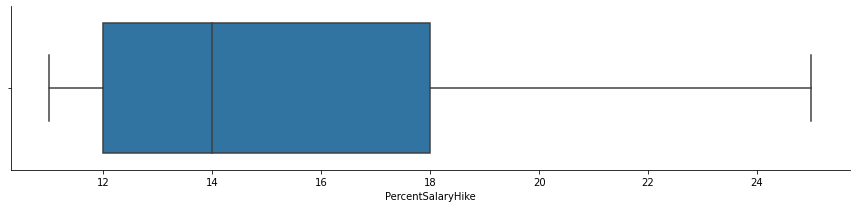

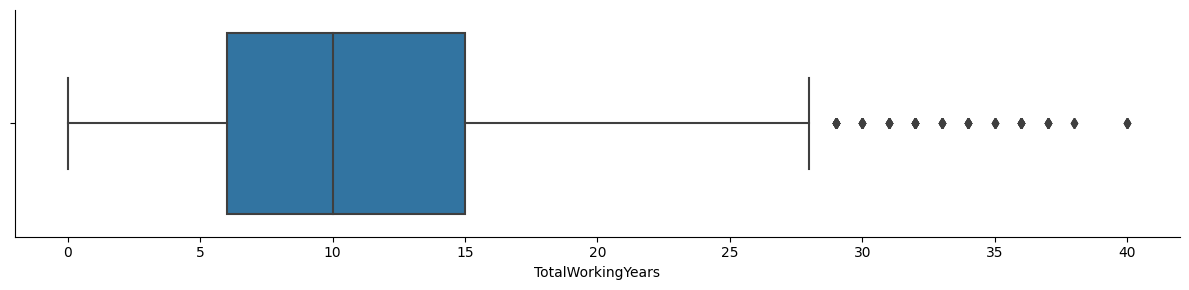

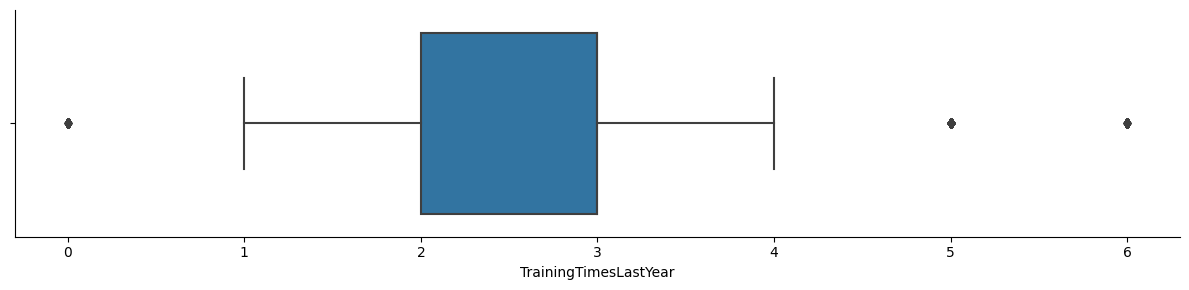

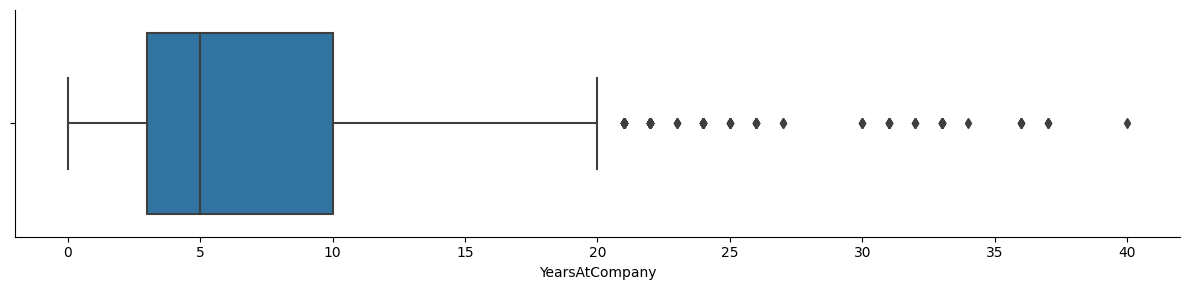

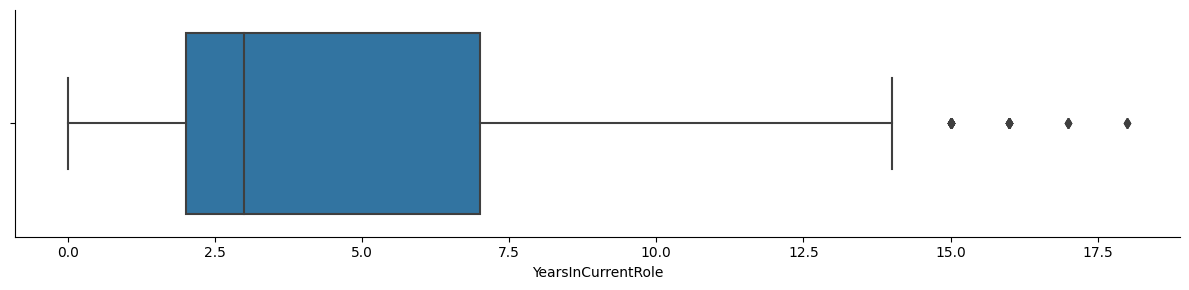

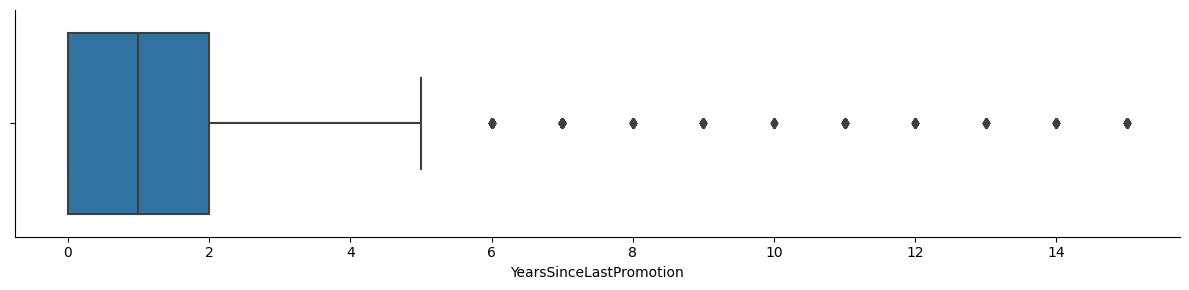

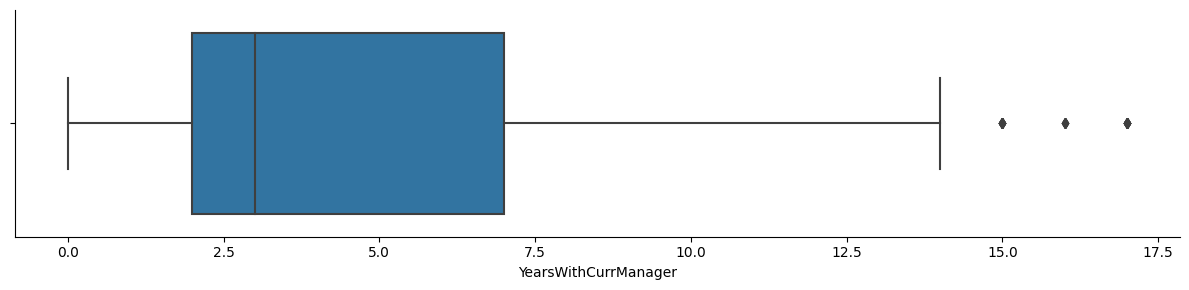

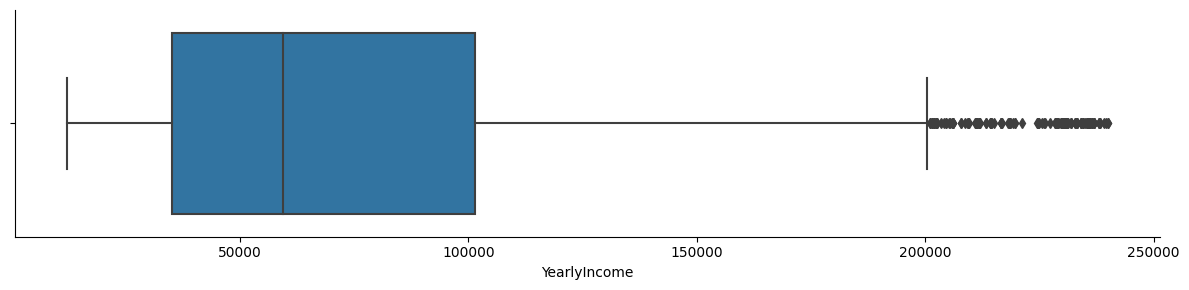

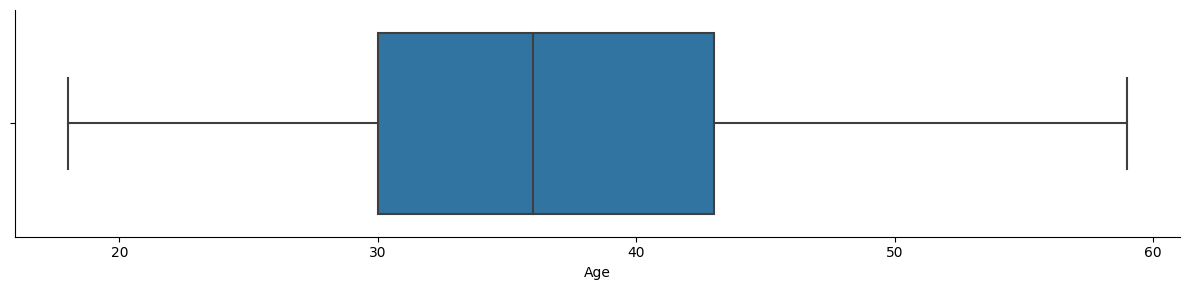

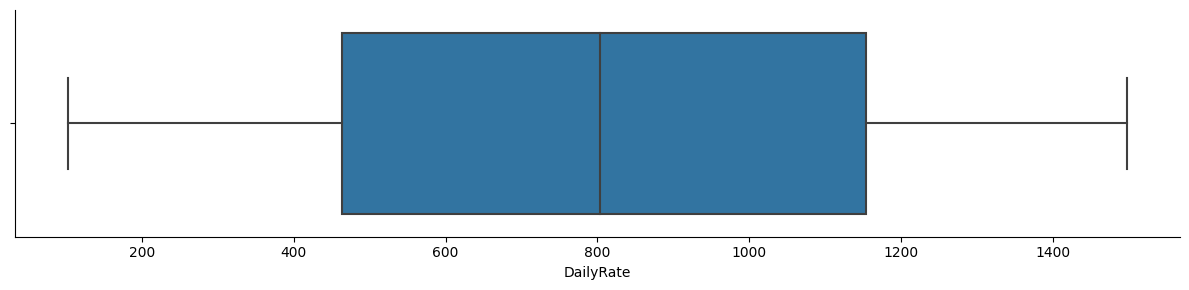

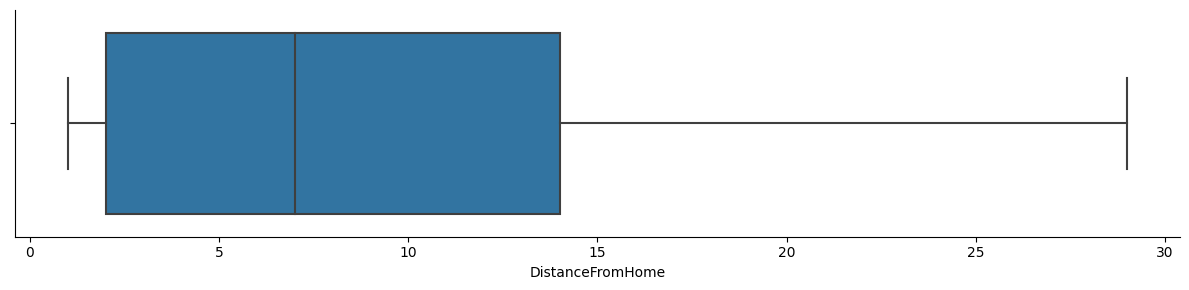

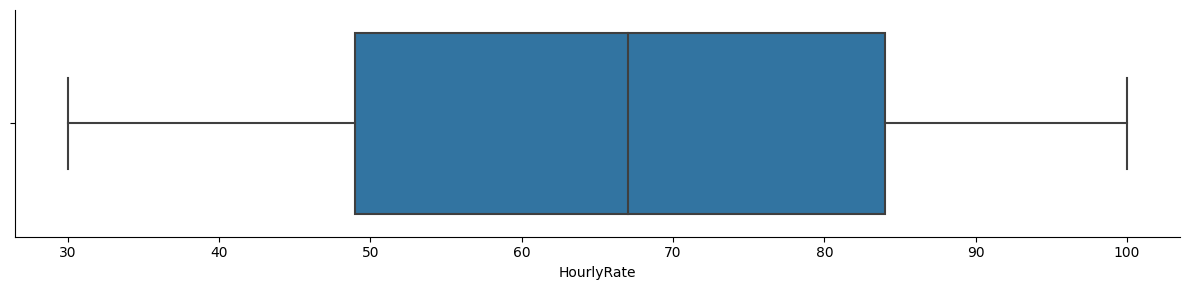

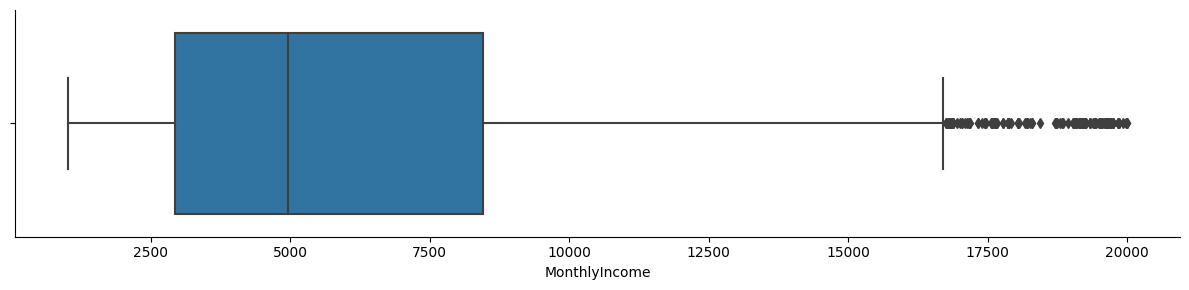

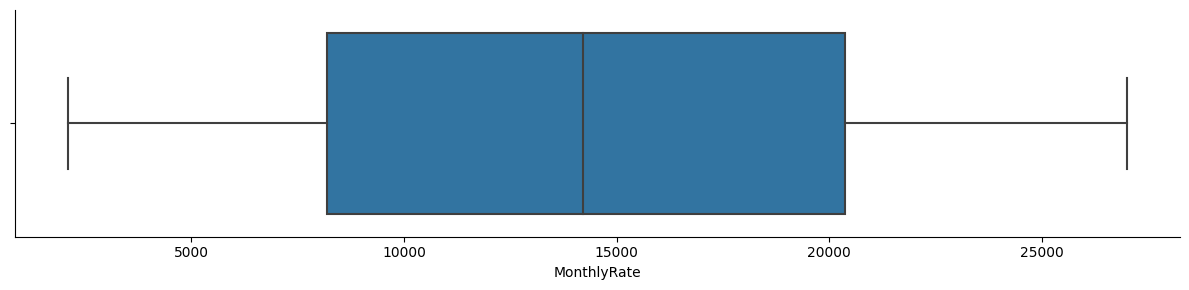

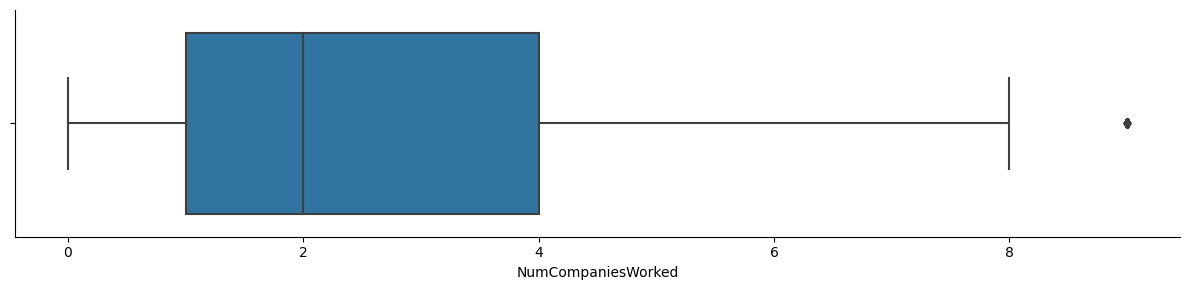

In [40]:
for col in list_num:
    sns.catplot(x = col, data = df_clean1, kind="box",  height=3, aspect=4)
    plt.show()

In [41]:
df_clean.groupby('Attrition')['PerformanceRating'].sum()

Attrition
No     4542.0
Yes    2833.0
Name: PerformanceRating, dtype: float64

***Ploting the distribution of categorical features to see if there is any correlation with the target feature 'Attrition'***

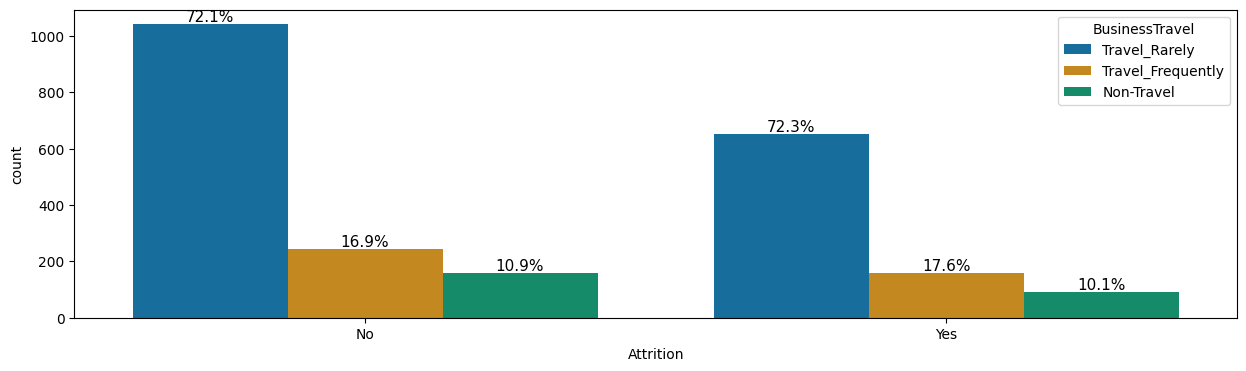

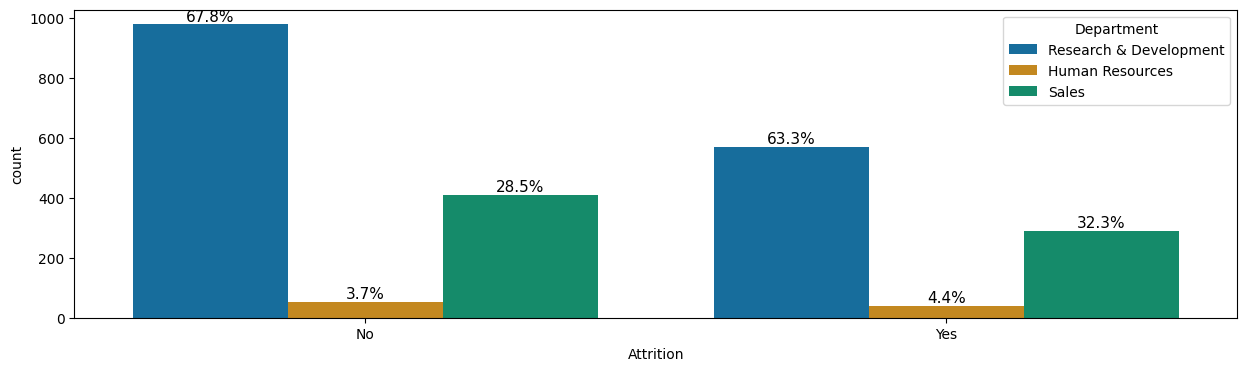

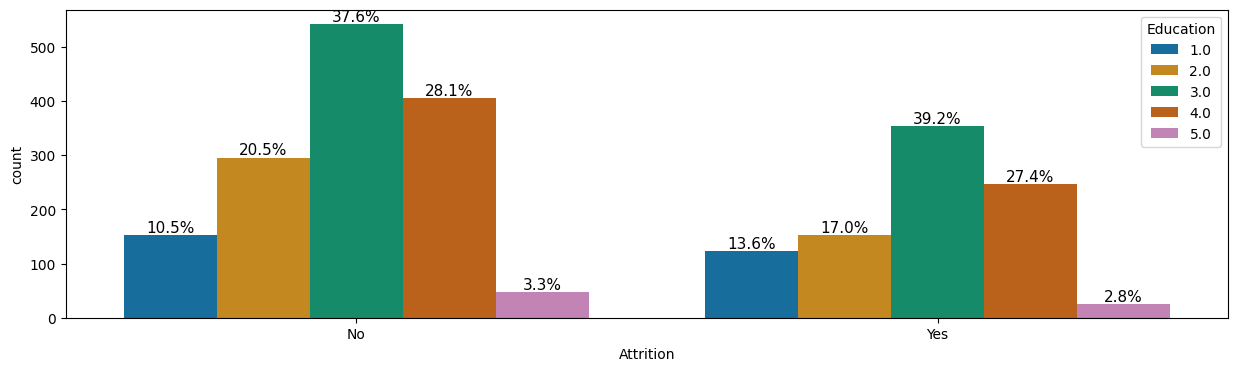

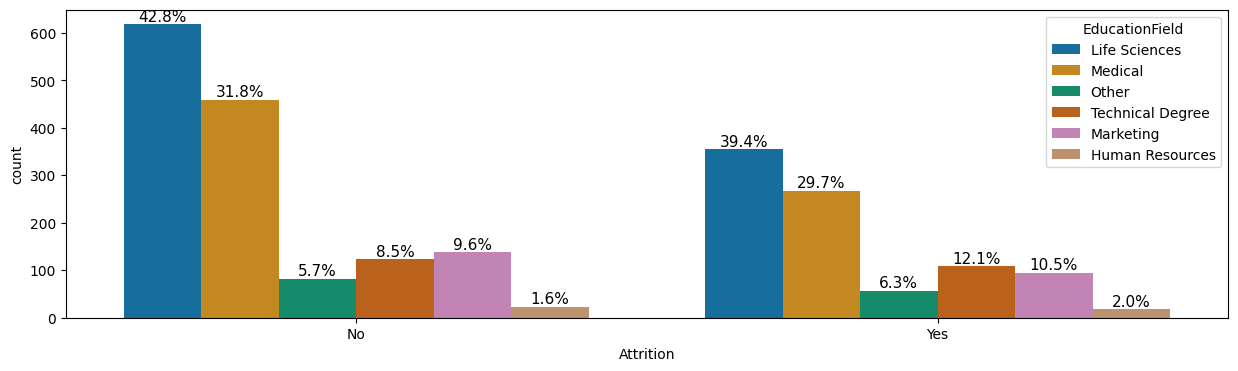

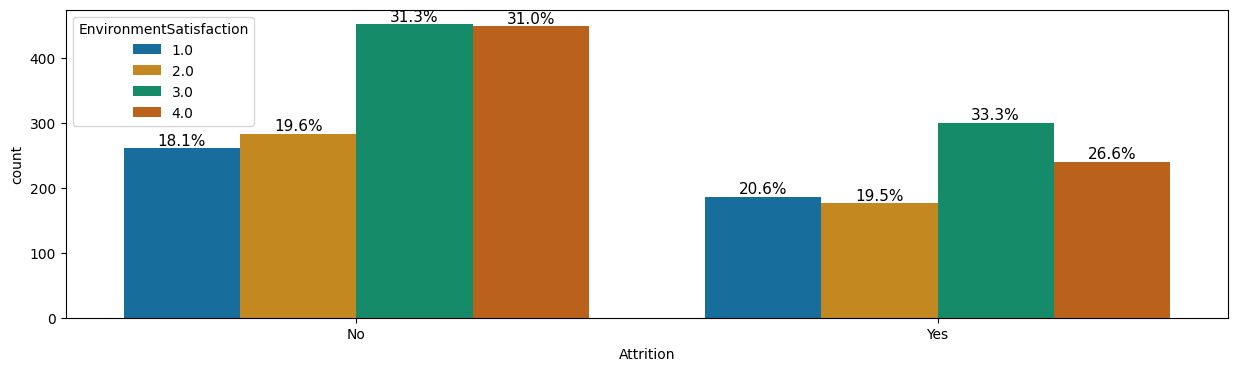

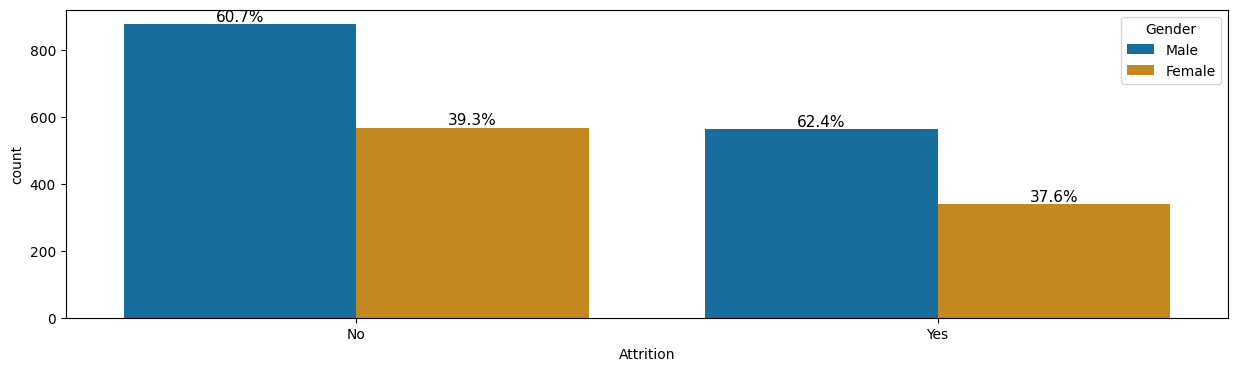

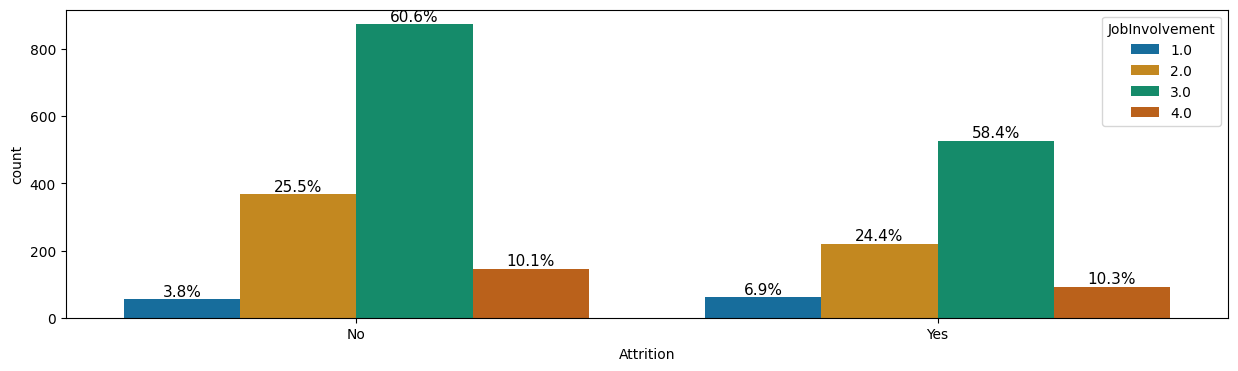

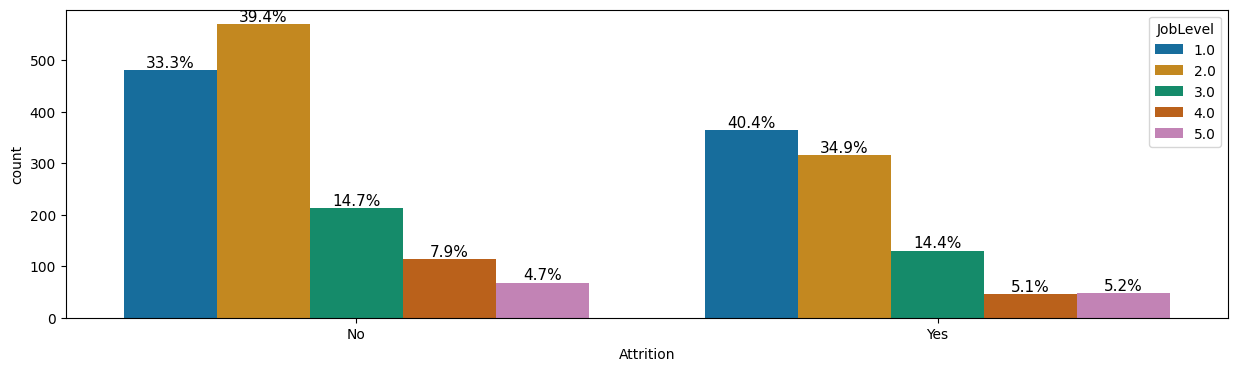

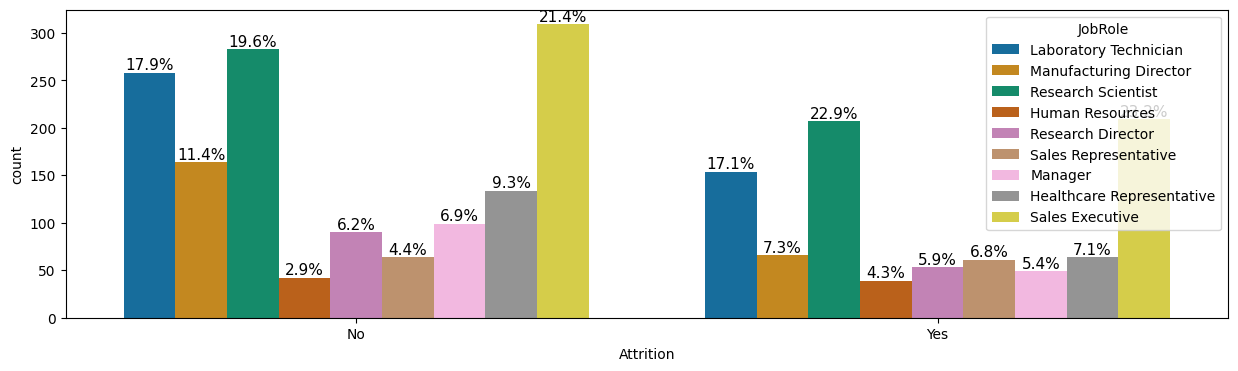

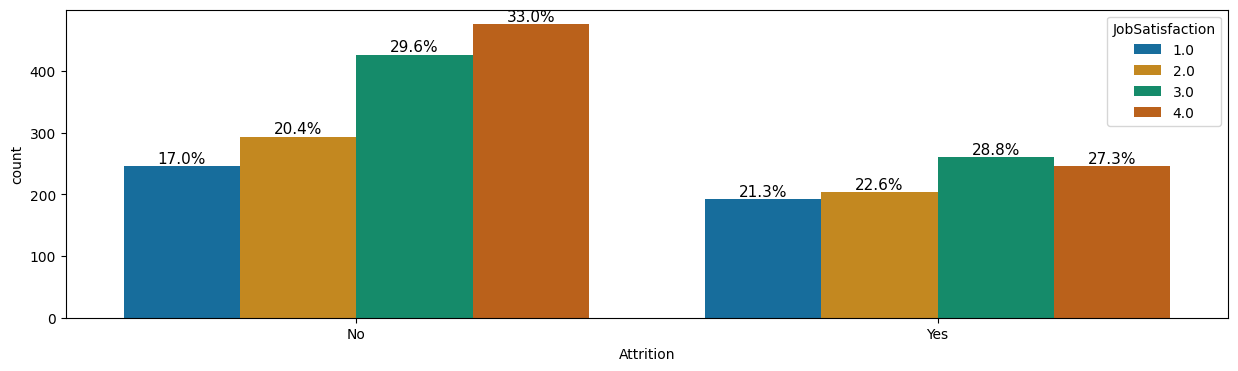

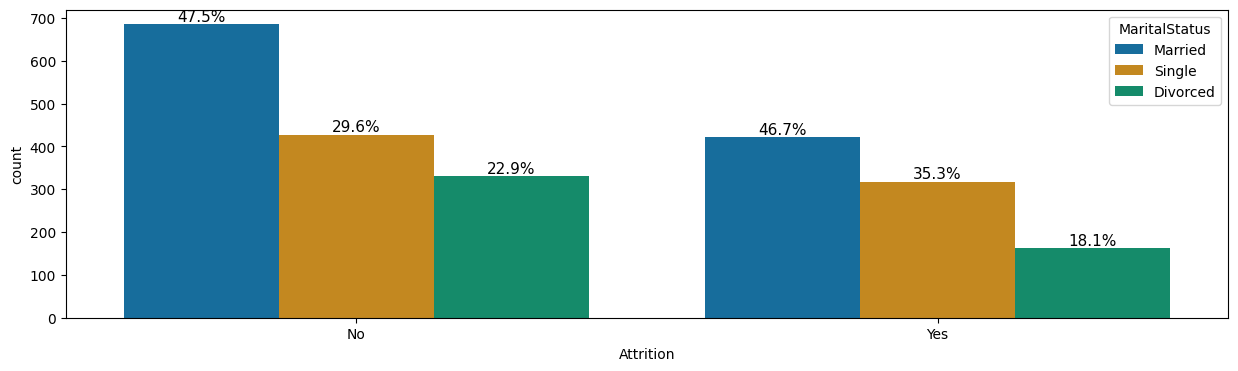

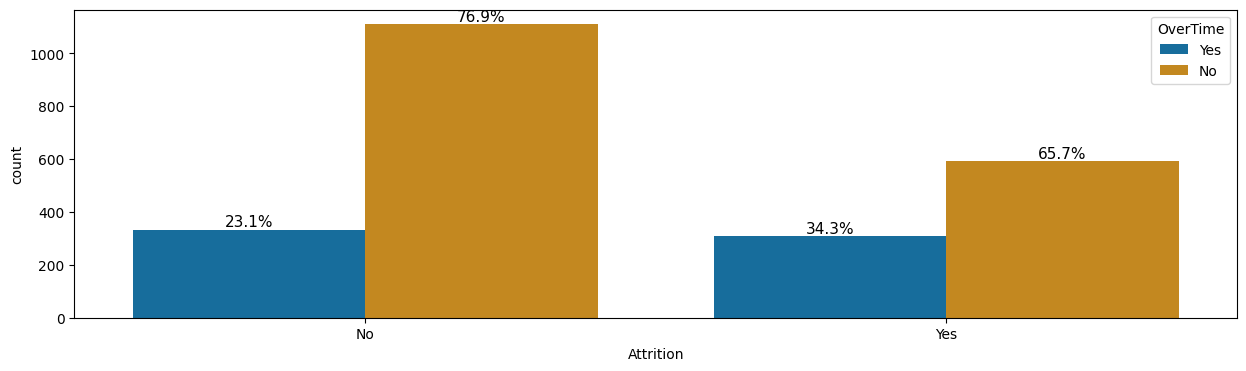

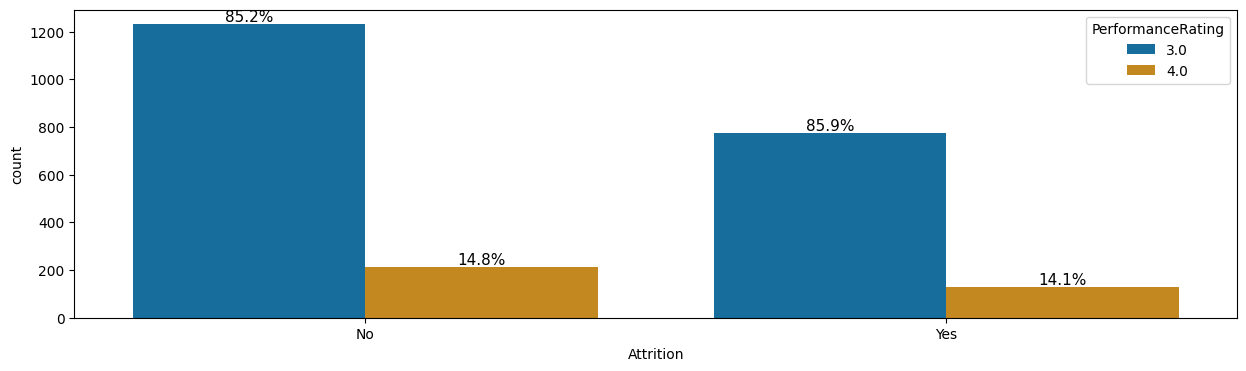

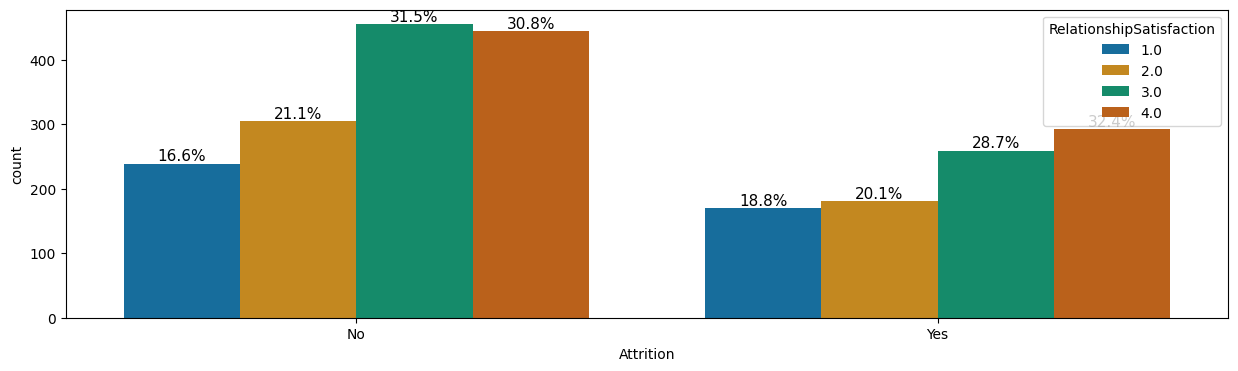

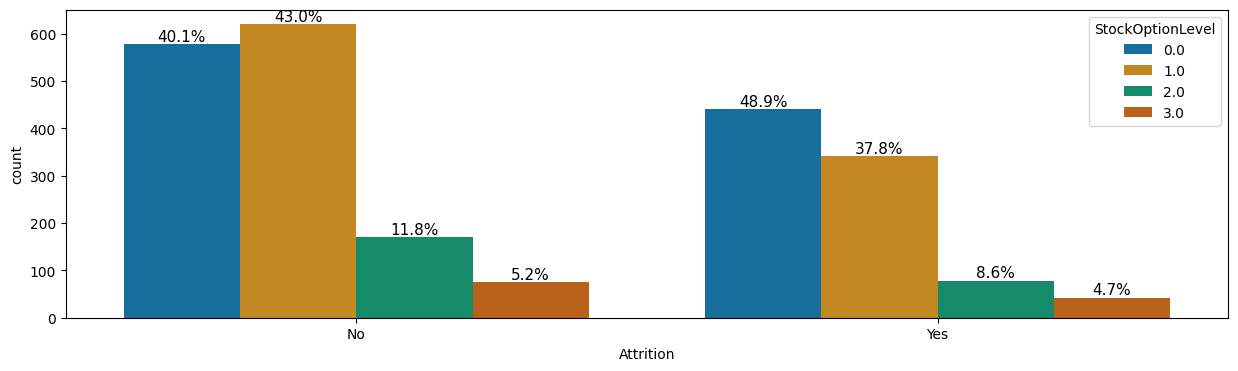

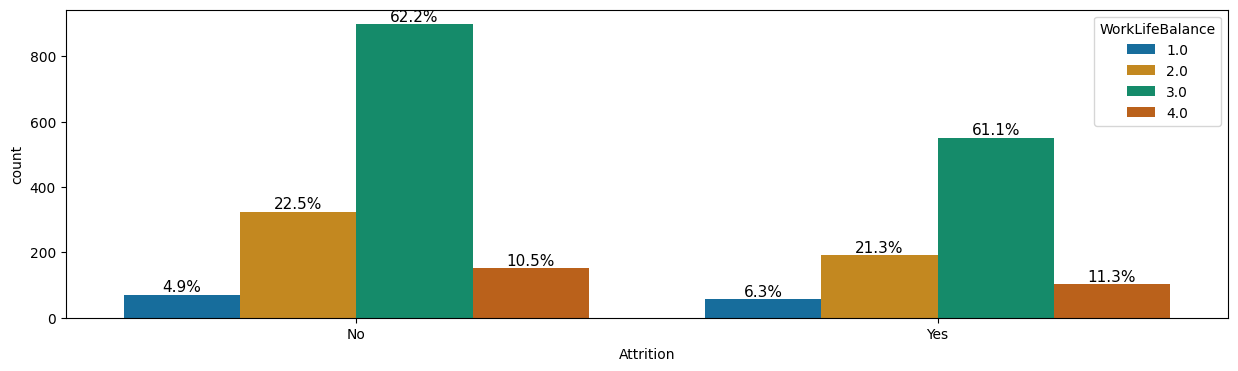

In [42]:
categ_list.remove('Attrition')
def percentage_above_bar_relative_to_xgroup(ax):
    all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    for bars in ax.containers:
        for i, p in enumerate(bars):
            total = sum(xgroup[i] for xgroup in all_heights)
            percentage = f'{(100 * p.get_height() / total) :.1f}%'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=11, ha='center', va='bottom')
for col in categ_list:
    sns.set_palette('colorblind')
    plt.figure(figsize=(15, 4))
    g = sns.countplot(x = 'Attrition' , data = df_clean1, hue = col)
    percentage_above_bar_relative_to_xgroup(g)
plt.show()

***Ploting the distribution of numerical features to see if there is any correlation with the target feature 'Attrition'***

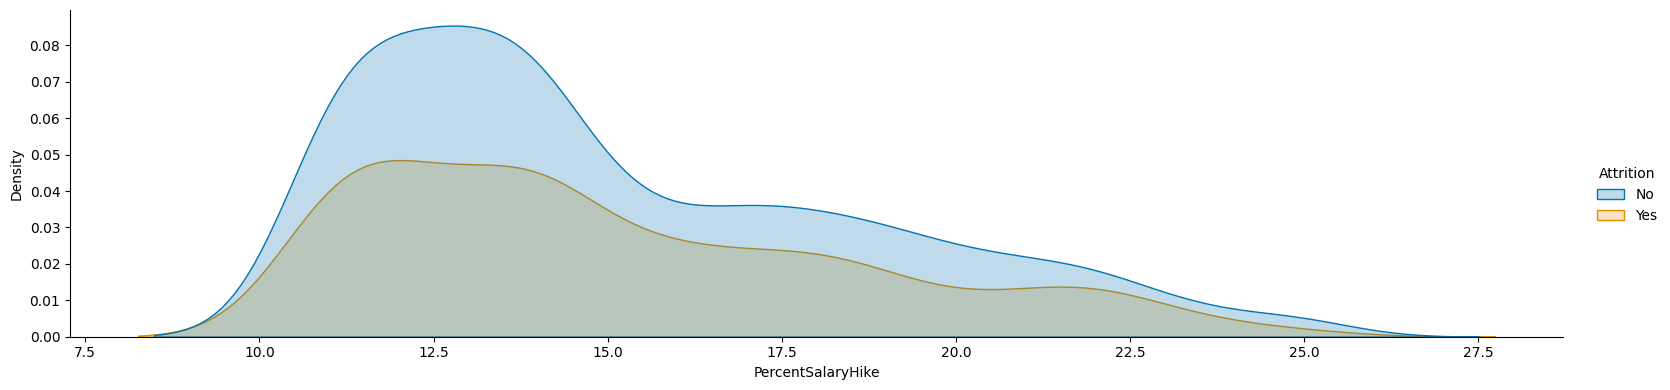

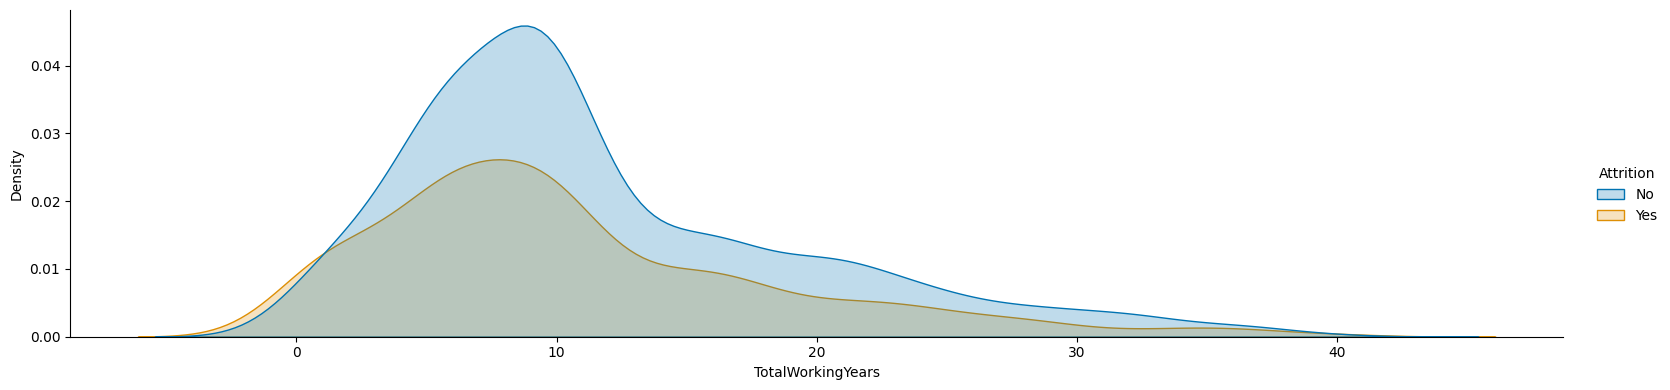

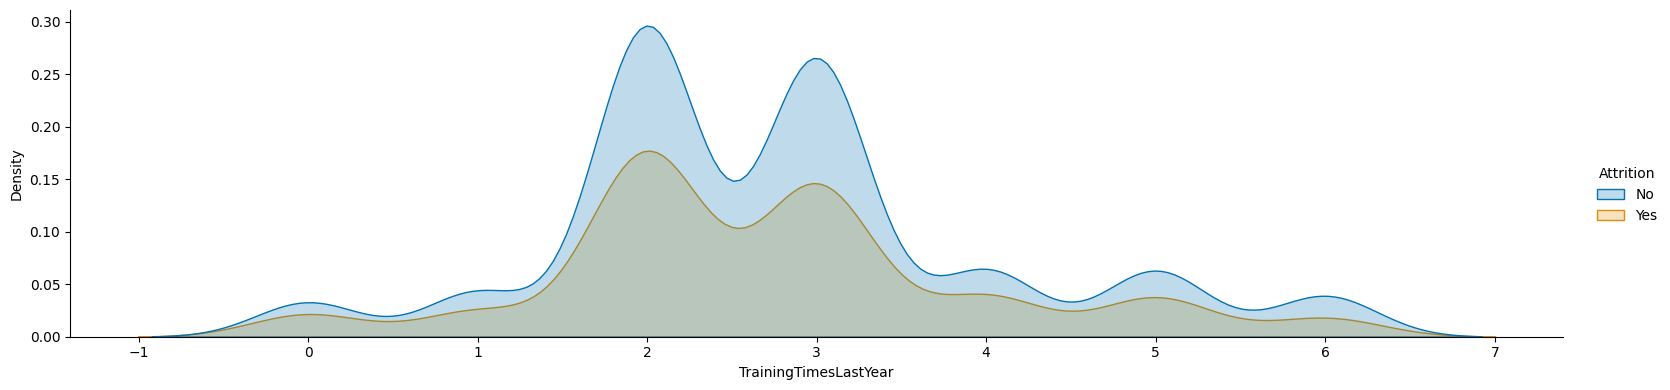

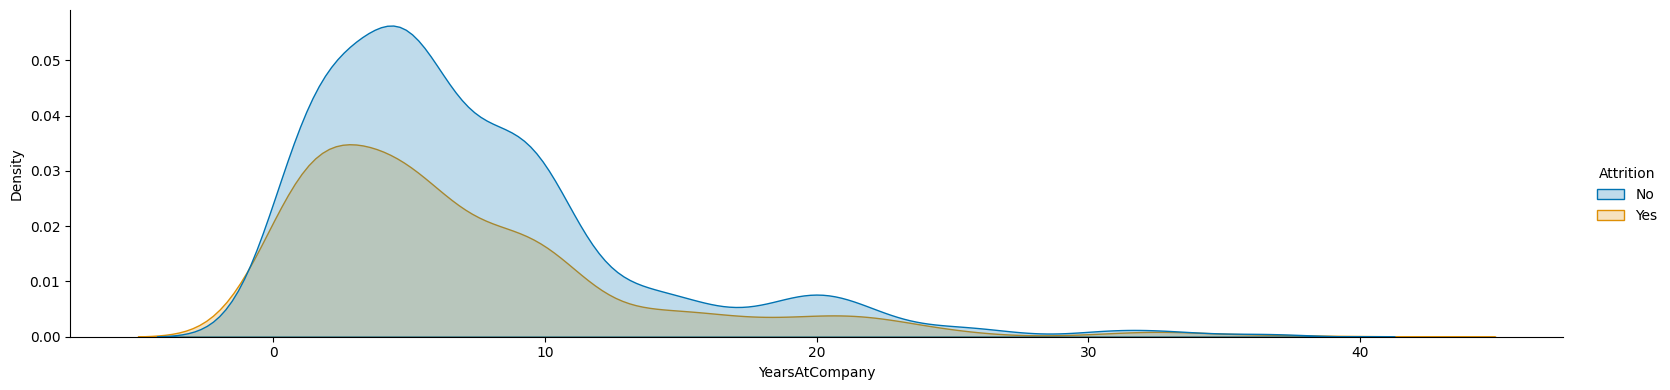

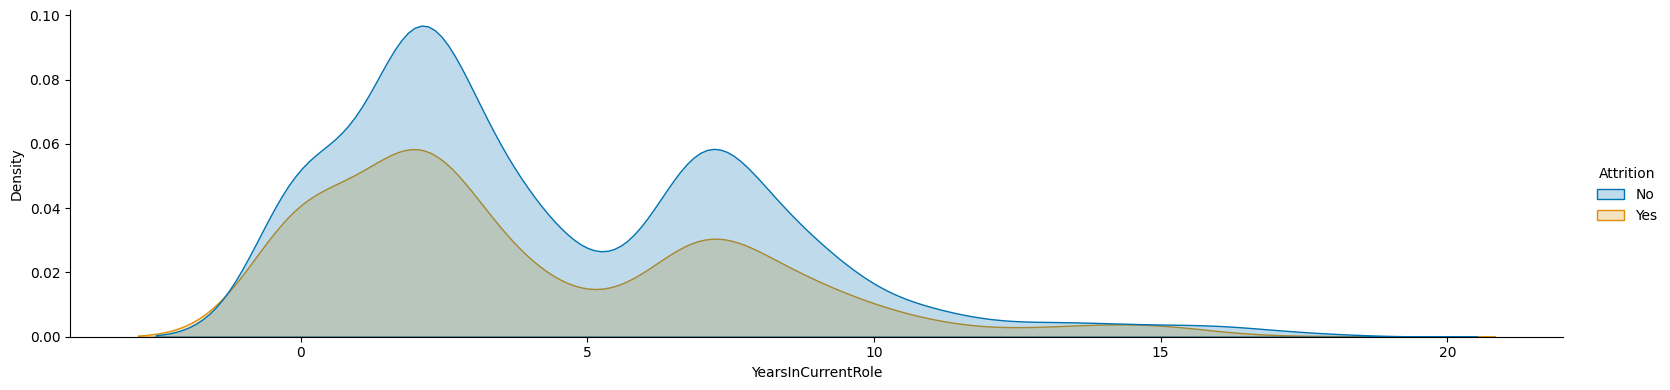

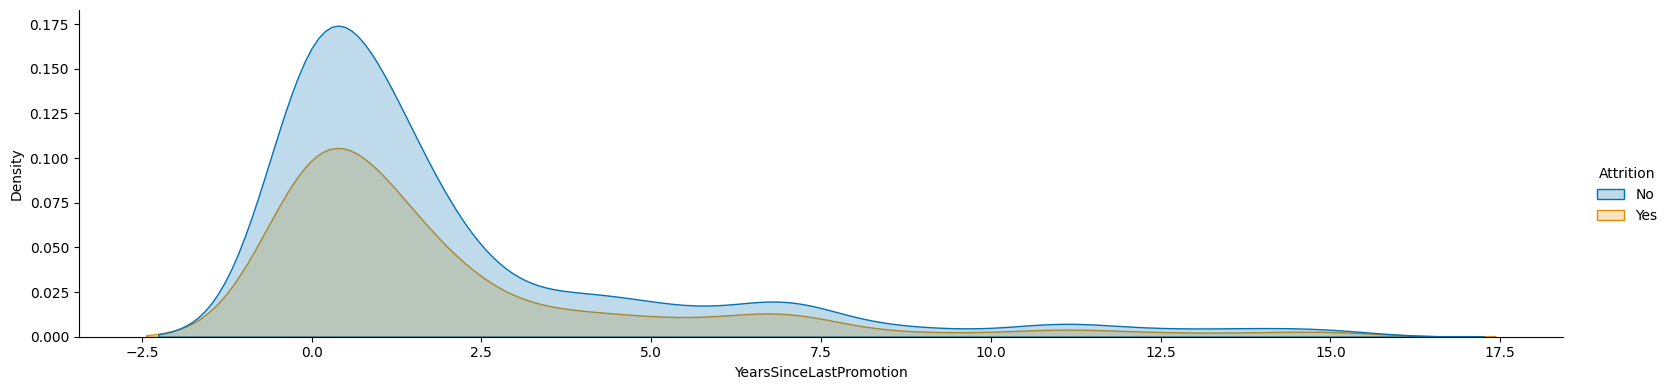

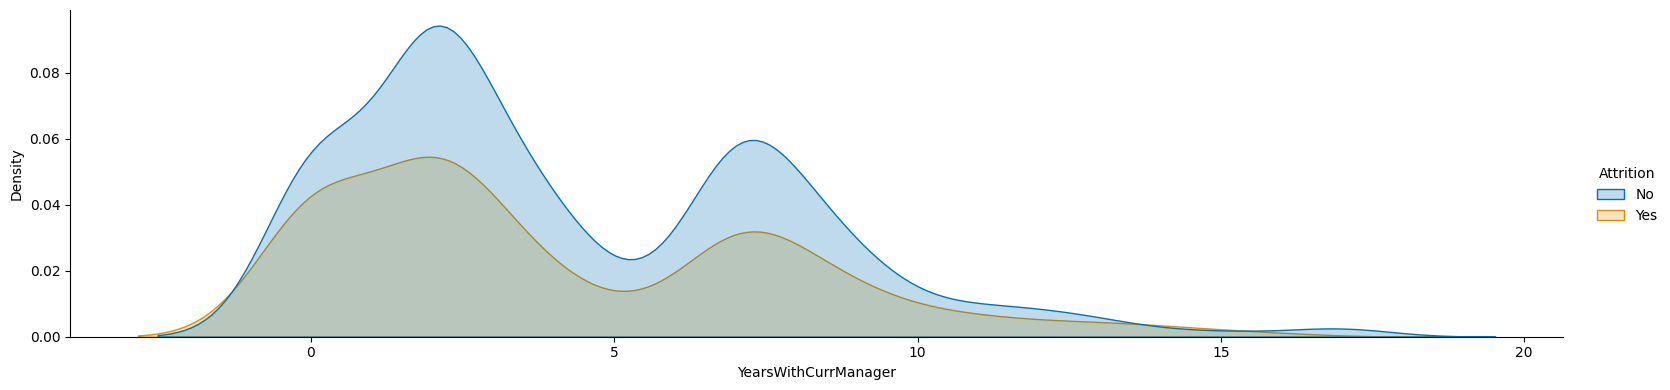

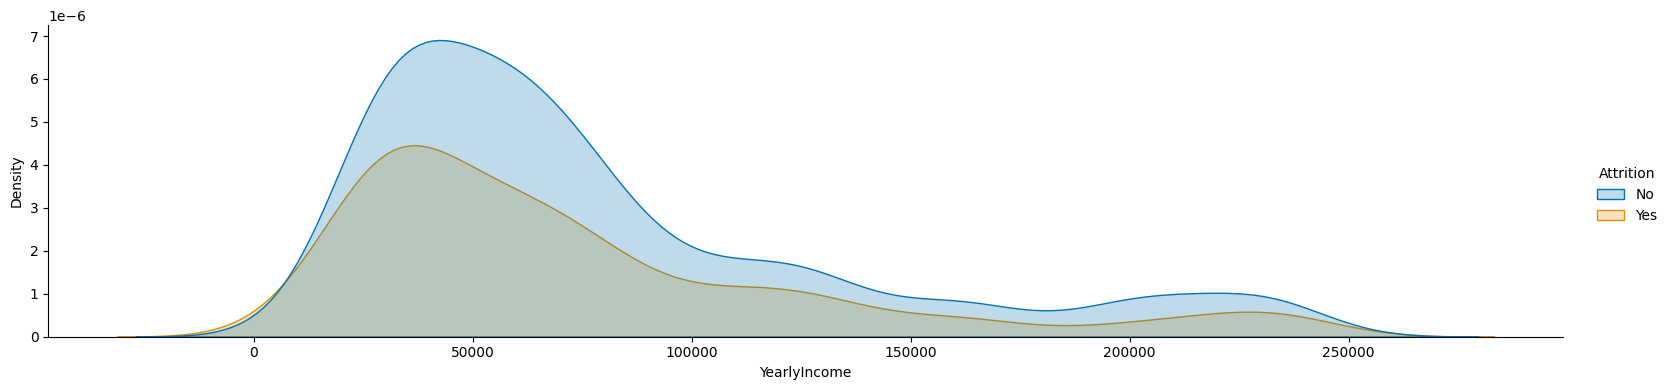

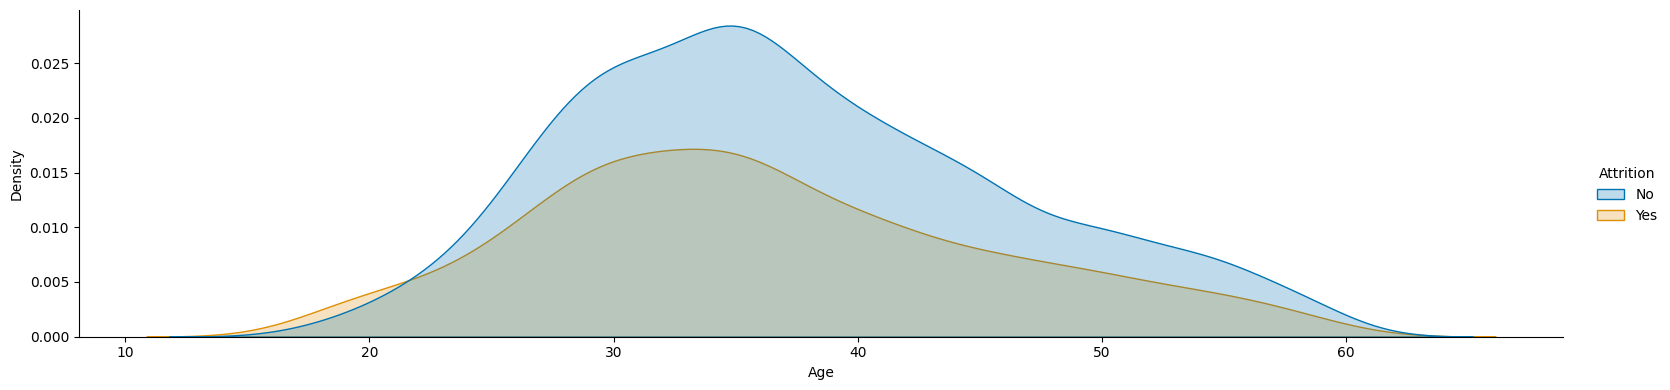

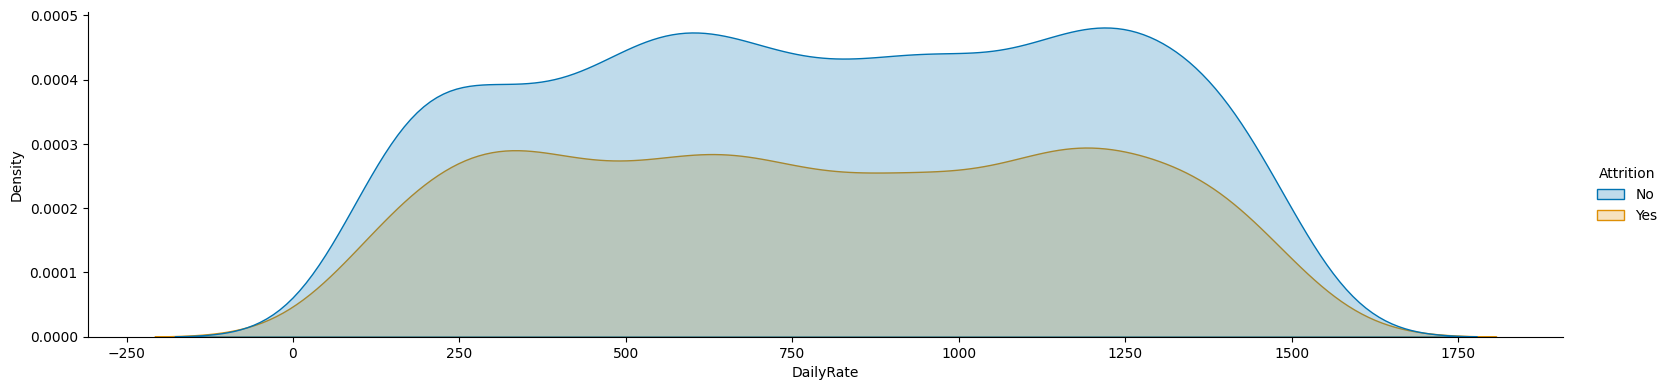

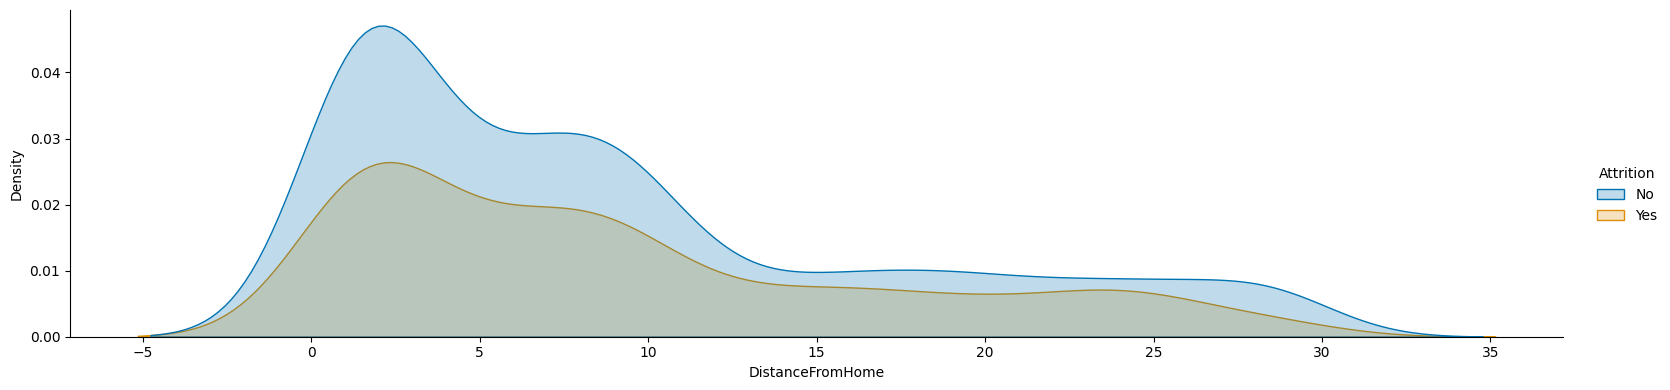

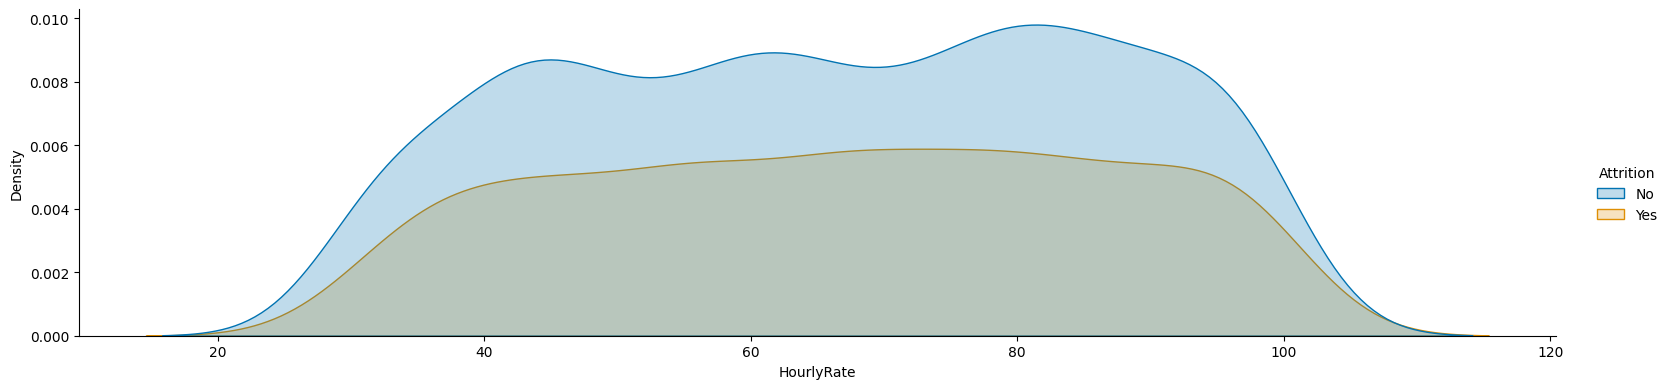

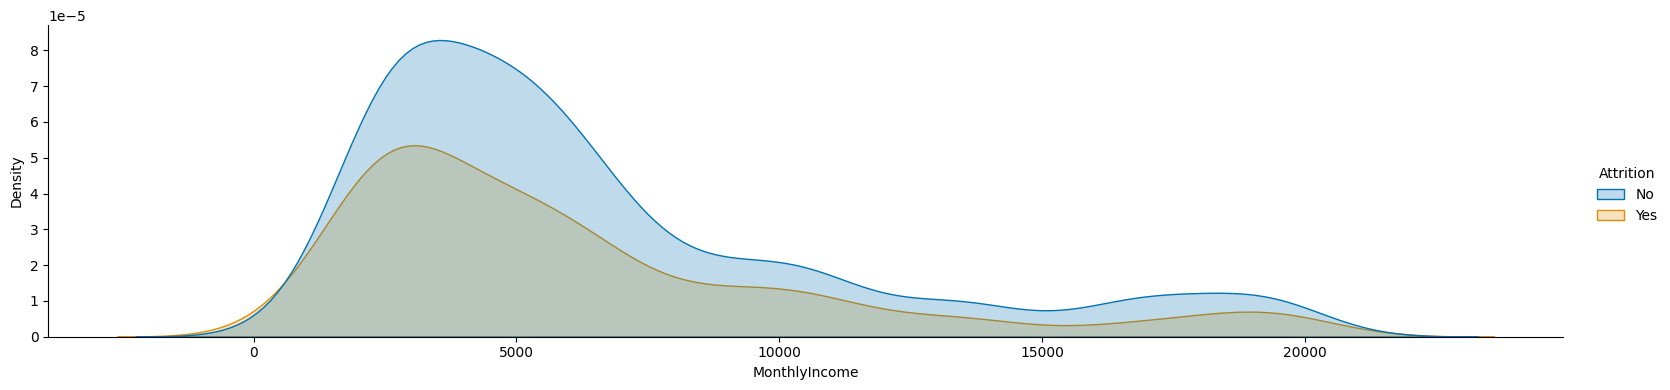

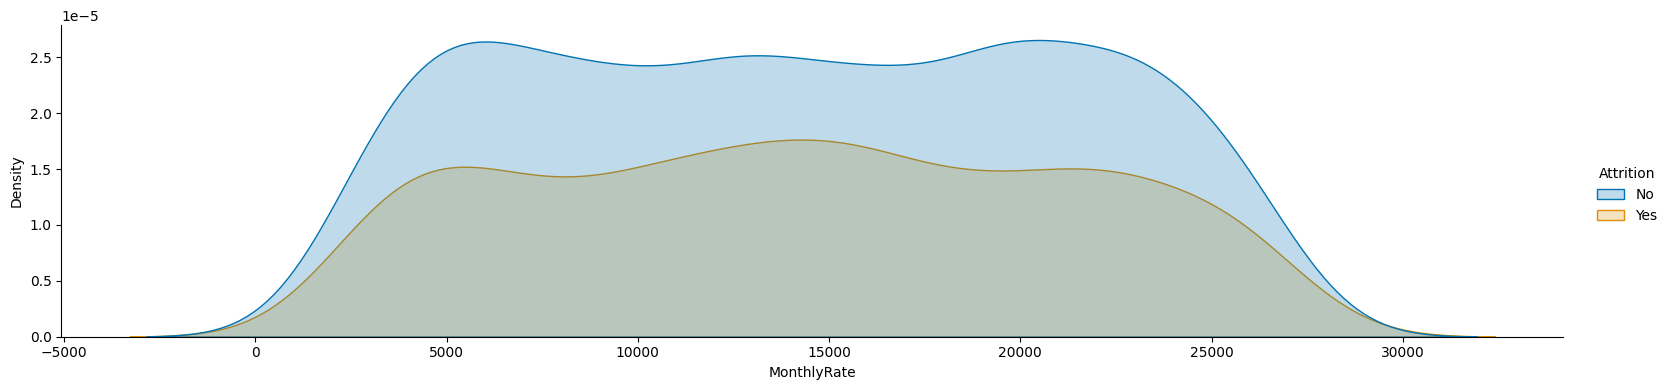

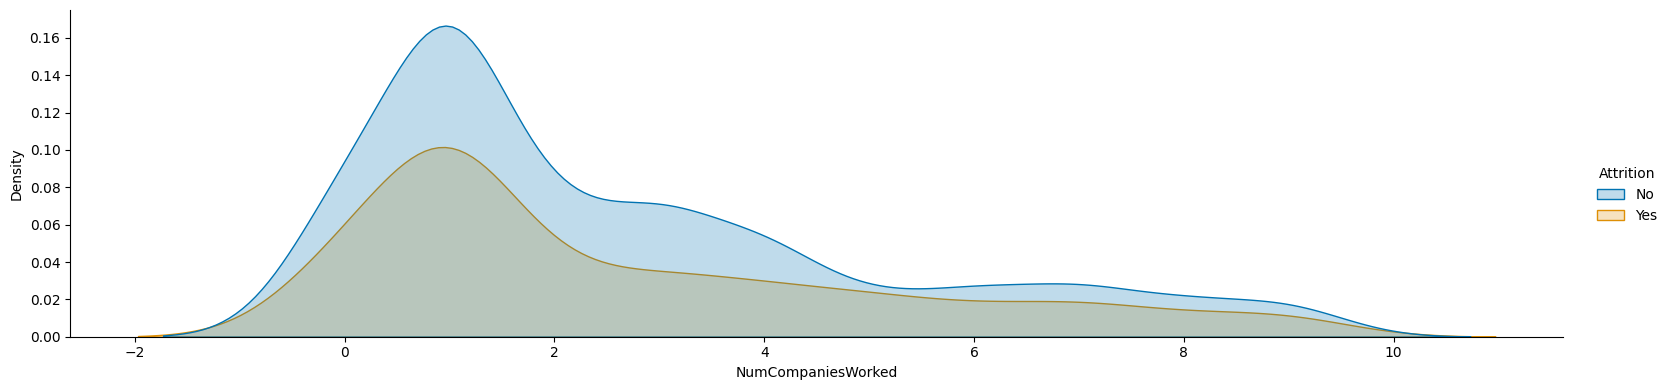

In [43]:
for col in list_num:
    sns.set_palette('colorblind')
    g = sns.displot(x =  col, data = df_clean1, kind ="kde", hue = 'Attrition', fill = True, height=4, aspect=4)
    plt.show()

***Data transformation -  encoding the categorical features***

In [44]:
obj_feat.sample(6)

,OverTime,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
3540,No,Yes,Travel_Rarely,Sales,Life Sciences,Male,Sales Representative,Married
829,No,No,Travel_Rarely,Research & Development,Life Sciences,Male,Healthcare Representative,Single
53,No,No,Travel_Rarely,Research & Development,Medical,Female,Research Director,Married
2087,No,Yes,Non-Travel,Sales,Medical,Female,Sales Executive,Single
2850,No,No,Travel_Rarely,Research & Development,Medical,Female,Research Scientist,Married
1538,Yes,Yes,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Divorced


In [45]:
#convert the entries in the columns in categorical type
maping = {'No': 0, 'Yes':1}
df_clean1['Attrition'] = df_clean1['Attrition'].replace(maping) 
df_clean1['Attrition'].value_counts()

0    1443
1     902
Name: Attrition, dtype: int64

In [46]:
df_clean1['BusinessTravel'].value_counts()

Travel_Rarely        1693
Travel_Frequently     403
Non-Travel            249
Name: BusinessTravel, dtype: int64

In [47]:
maping1 = {'Non-Travel': 0, 'Travel_Rarely':1, 'Travel_Frequently':2}
df_clean1['BusinessTravel'] = df_clean1['BusinessTravel'].replace(maping1) 
df_clean1['BusinessTravel'].value_counts()

1    1693
2     403
0     249
Name: BusinessTravel, dtype: int64

In [48]:
#convert the entries in the columns in categorical type
cols_to_change =['Attrition', 'BusinessTravel']
for num_col in cols_to_change: 
    df_clean1[num_col] = df_clean1[num_col].astype('category').cat.codes
df_clean1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2345 entries, 0 to 4432
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   OverTime                  2345 non-null   object 
 1   PercentSalaryHike         2345 non-null   float64
 2   PerformanceRating         2345 non-null   float64
 3   RelationshipSatisfaction  2345 non-null   float64
 4   StockOptionLevel          2345 non-null   float64
 5   TotalWorkingYears         2345 non-null   float64
 6   TrainingTimesLastYear     2345 non-null   float64
 7   WorkLifeBalance           2345 non-null   float64
 8   YearsAtCompany            2345 non-null   float64
 9   YearsInCurrentRole        2345 non-null   float64
 10  YearsSinceLastPromotion   2345 non-null   float64
 11  YearsWithCurrManager      2345 non-null   float64
 12  Attrition                 2345 non-null   int8   
 13  YearlyIncome              2345 non-null   float64
 14  Age     

In [49]:
obj_feat.columns

Index(['OverTime', 'Attrition', 'BusinessTravel', 'Department',
       'EducationField', 'Gender', 'JobRole', 'MaritalStatus'],
      dtype='object')

In [50]:
#convert the categorical features to binary feautures (dummy variabiles)
df_clean2 = pd.get_dummies(df_clean1, columns=['OverTime', 'Department',
       'EducationField', 'Gender', 'JobRole', 'MaritalStatus'], drop_first = True)
df_clean2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2345 entries, 0 to 4432
Data columns (total 45 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   PercentSalaryHike                  2345 non-null   float64
 1   PerformanceRating                  2345 non-null   float64
 2   RelationshipSatisfaction           2345 non-null   float64
 3   StockOptionLevel                   2345 non-null   float64
 4   TotalWorkingYears                  2345 non-null   float64
 5   TrainingTimesLastYear              2345 non-null   float64
 6   WorkLifeBalance                    2345 non-null   float64
 7   YearsAtCompany                     2345 non-null   float64
 8   YearsInCurrentRole                 2345 non-null   float64
 9   YearsSinceLastPromotion            2345 non-null   float64
 10  YearsWithCurrManager               2345 non-null   float64
 11  Attrition                          2345 non-null   int8 

***Checking if there is any correlation  between the employee characteristics and target variable 'Attrition'***

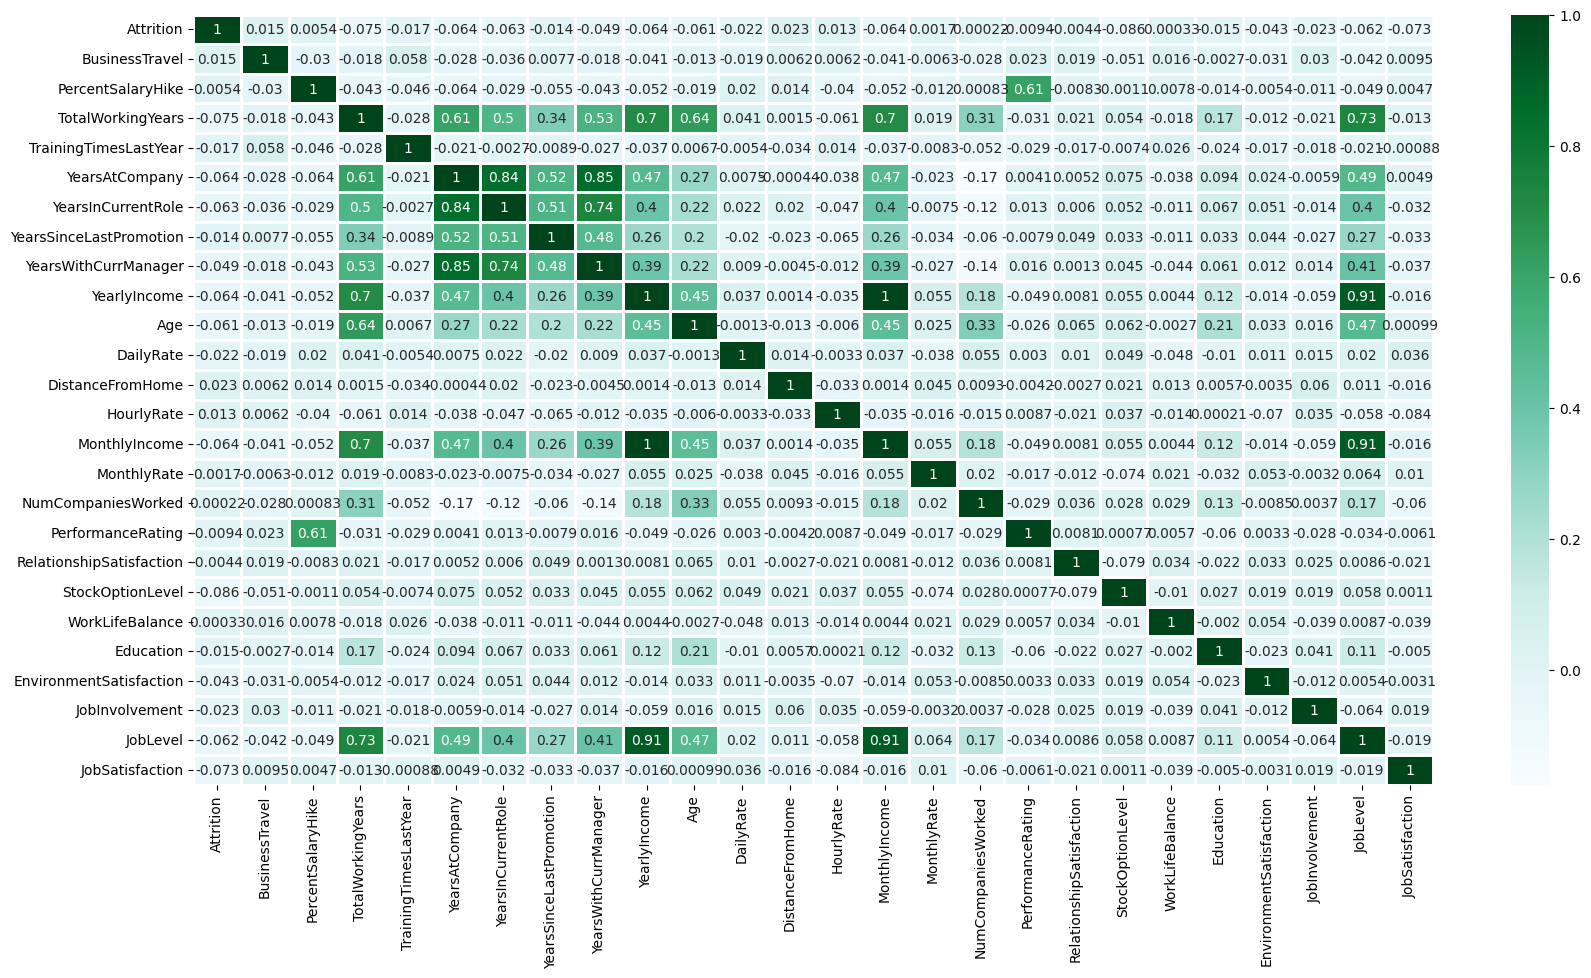

In [51]:
#we check the correlations between target variable and  variables with numerical and ordinal categorical data
y_corr = df_clean2[cols_to_change + list_num + categ_columns()].corr(method='spearman')
plt.figure(figsize=(20,10))
sns.set_palette('colorblind')
sns.heatmap(y_corr, annot = True, cmap ='BuGn', linewidths= 1)
plt.show()

In [52]:
df_corr = y_corr.iloc[:, 0:1].sort_values(by = 'Attrition', ascending = False)
df_corr

,Attrition
Attrition,1.000000
DistanceFromHome,0.023490
BusinessTravel,0.014529
HourlyRate,0.013156
PercentSalaryHike,0.005442
MonthlyRate,0.001690
WorkLifeBalance,0.000328
NumCompaniesWorked,0.000222
RelationshipSatisfaction,-0.004393
PerformanceRating,-0.009411


# Evaluating different classification algorithms

***Choosing classification model using a short-listed set of independent variables***

In [53]:
# We create a list of independet variables that have higher correlation coefficient with target variable 
list_var_ind =list(df_corr.iloc[1:6].index) + list(df_corr.iloc[-11:-1].index)
list_var_ind 

['DistanceFromHome',
 'BusinessTravel',
 'HourlyRate',
 'PercentSalaryHike',
 'MonthlyRate',
 'EnvironmentSatisfaction',
 'YearsWithCurrManager',
 'Age',
 'JobLevel',
 'YearsInCurrentRole',
 'MonthlyIncome',
 'YearlyIncome',
 'YearsAtCompany',
 'JobSatisfaction',
 'TotalWorkingYears']

In [54]:
# remove features that are strongly correlated between themselves
remove_features = ['JobLevel', 'MonthlyIncome', 'YearsWithCurrManager', 'YearsInCurrentRole', 'YearlyIncome']
list_var_ind_finala = list(set(list_var_ind).difference(set(remove_features)))
list_var_ind_finala

['PercentSalaryHike',
 'BusinessTravel',
 'TotalWorkingYears',
 'Age',
 'EnvironmentSatisfaction',
 'DistanceFromHome',
 'MonthlyRate',
 'YearsAtCompany',
 'JobSatisfaction',
 'HourlyRate']

In [55]:
# Create arrays for the targget variable and the independent variables (variables with a higher correlation coefficient with targget variable) 
X = df_clean2[list_var_ind_finala]
y = df_clean2['Attrition']
X.shape, y.shape

((2345, 10), (2345,))

In [56]:
# Choosing classification model 
def evaluating_classification_models(X, y):
    models = {"Logistic Regression": LogisticRegression(random_state = 42),
          "KNN":neighbors.KNeighborsClassifier(),
          "SVM":svm.SVC(random_state = 42),
          "Naive_Bayes":naive_bayes.GaussianNB(),
          "Random Forest": RandomForestClassifier(random_state = 42),
          "Decision Tree": DecisionTreeClassifier(random_state = 42),
          "AdaBoostClassifier": AdaBoostClassifier(random_state = 42)}
    dict_score = {}
    y_pred_dict ={}
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_dict.update({name:y_pred})
        test_score = f1_score(y_test, y_pred)
        dict_score.update({name:test_score})     
        df_score=pd.DataFrame(data=dict_score, index = ['f1_score'])
        fpr, tpr, _ = roc_curve(y_test, y_pred)
        auc = round(roc_auc_score(y_test, y_pred), 4)
        plt.plot(fpr, tpr, label = name + ", AUC=" + str(auc))
    plt.legend()
    print(df_score.T.sort_values(by ='f1_score'))

                     f1_score
Logistic Regression  0.000000
SVM                  0.000000
Naive_Bayes          0.116883
AdaBoostClassifier   0.220386
Decision Tree        0.338028
Random Forest        0.366379
KNN                  0.382812


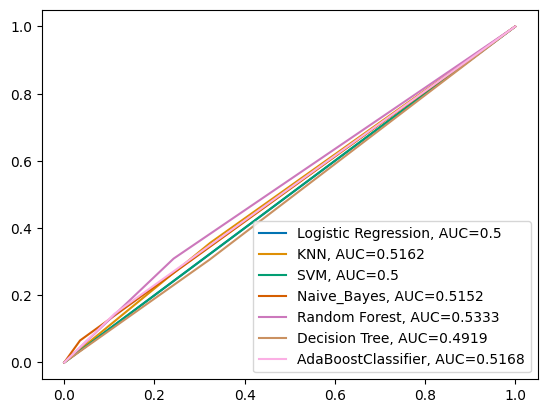

In [57]:
evaluating_classification_models(X, y)

In [58]:
#Finding the best parameters
def hyperparameter_tuning(X, y):
    params_dict = {naive_bayes.GaussianNB(): {'var_smoothing': np.logspace(0,-9, num=10)},
                   LogisticRegression(): {"solver": ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],"C": np.linspace(0.01, 1.0, 100)},
                   neighbors.KNeighborsClassifier(): {'n_neighbors': list(range(1,21)),'weights' : ['uniform', 'distance']},
                   DecisionTreeClassifier(): {'criterion': ['gini', 'entropy', 'log_loss'], 'splitter': ['best', 'random'], 'max_depth': list(range(3,10))+['None'], 'min_samples_split': [2, 5, 10]},
                   RandomForestClassifier(): {'n_estimators':[50, 100, 150], 'criterion': ['gini', 'entropy', 'log_loss'], 'max_depth': list(range(3,10))+['None'], 'min_samples_split': [2, 5, 10]},
                   AdaBoostClassifier(): {'n_estimators':[50, 100, 150], 'learning_rate': [1.0, 2.0, 5.0]}}
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)
    best_params_dict ={}
    for model, param in params_dict.items():
                t0 = datetime.now()
                rand_scv = RandomizedSearchCV(estimator = model,
                                       param_distributions = param,
                                       random_state = 42,
                                       n_jobs = -1)
                rand_scv.fit(X_train, y_train)
                best_param = rand_scv.best_params_
                best_params_dict.update({model:best_param})
                t1 = datetime.now()
                dt = t1 - t0
    print(dt)
    return best_params_dict

In [59]:
hyperparameter_tuning(X, y)

0:00:01.326308


{GaussianNB(): {'var_smoothing': 1e-08},
 LogisticRegression(): {'solver': 'newton-cg', 'C': 0.19},
 KNeighborsClassifier(): {'weights': 'uniform', 'n_neighbors': 4},
 DecisionTreeClassifier(): {'splitter': 'random',
  'min_samples_split': 2,
  'max_depth': 3,
  'criterion': 'log_loss'},
 RandomForestClassifier(): {'n_estimators': 100,
  'min_samples_split': 2,
  'max_depth': 3,
  'criterion': 'entropy'},
 AdaBoostClassifier(): {'n_estimators': 50, 'learning_rate': 2.0}}

In [70]:
#Choosing regression model with  best parameters
models = {"Naive_Bayes":naive_bayes.GaussianNB(var_smoothing = 1e-08),
          "Logistic Regression": LogisticRegression(solver = 'newton-cg', C = 0.19),
          "KNN":neighbors.KNeighborsClassifier(weights = 'uniform', n_neighbors = 4),
          "SVM":svm.SVC(kernel = 'linear',  C = 0.1),
          "Decision Tree": DecisionTreeClassifier(splitter = 'random', criterion ='log_loss', max_depth = 3, min_samples_split= 2),
          "Random Forest": RandomForestClassifier(n_estimators = 100, criterion ='entropy', max_depth = 3, min_samples_split = 2),
          "AdaBoostClassifier": AdaBoostClassifier(n_estimators = 50, learning_rate = 2.0)}
def evaluating_classification_models_with_hyperpar(X, y, models_dict):
    dict_score ={}
    plot_cm = {}
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        test_score = f1_score(y_test, y_pred)
        plot_cm.update({name : confusion_matrix(y_test, y_pred)})
        dict_score.update({name:test_score})
        df_score=pd.DataFrame(data=dict_score, index = ['f1_score'])
    print(df_score.T.sort_values(by ='f1_score'))
    for key, val in plot_cm.items():
        sns.heatmap(val, annot=True, fmt='d').set(title=key)
        plt.show()

                     f1_score
Logistic Regression  0.021352
Decision Tree        0.028470
Naive_Bayes          0.068027
Random Forest        0.147436
SVM                  0.159021
KNN                  0.275362
AdaBoostClassifier   0.561798


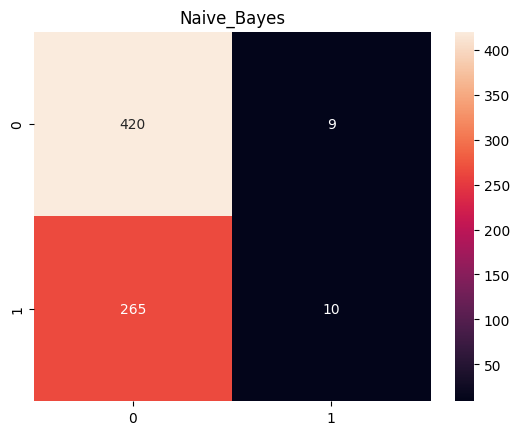

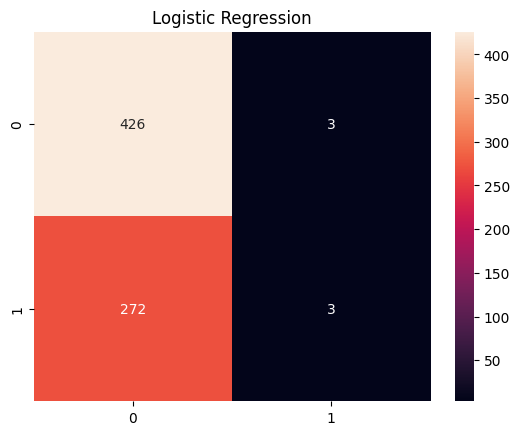

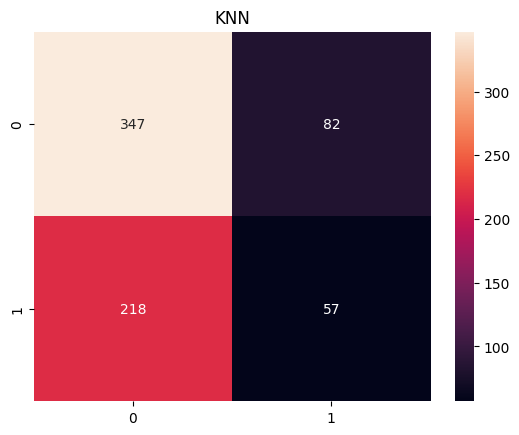

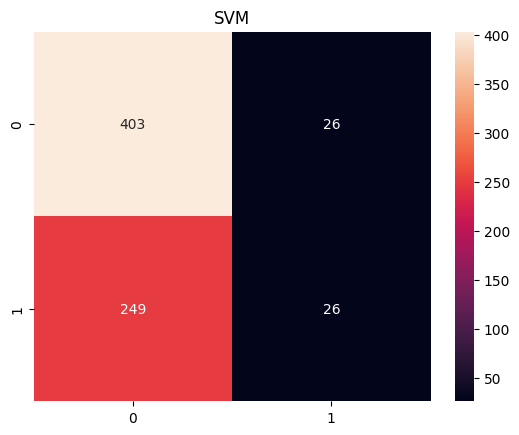

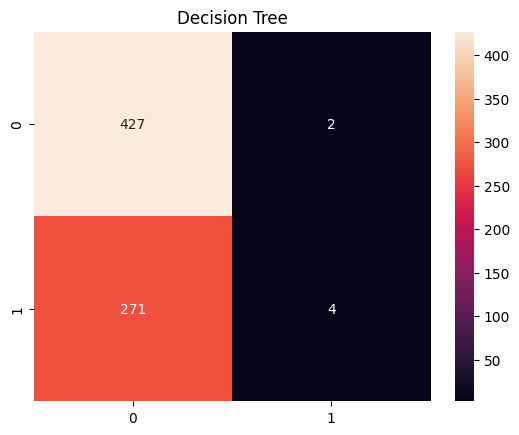

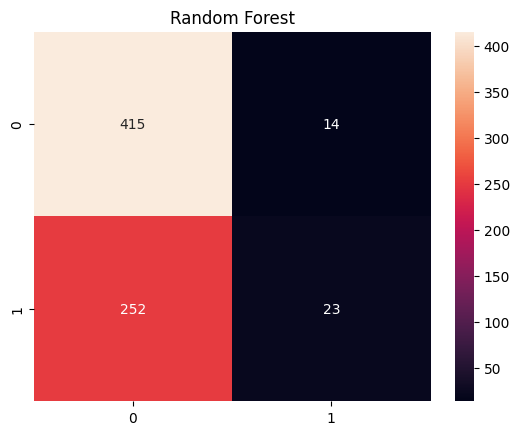

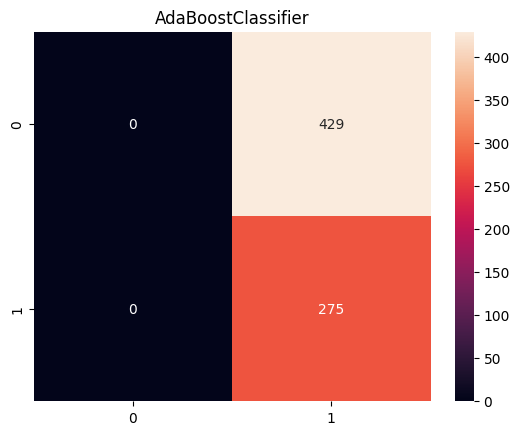

In [71]:
evaluating_classification_models_with_hyperpar(X, y, models)

***Choosing classification model using all the independent variables of the dataframe***

In [62]:
# Create arrays for the targget variable and the independent variable (all columns from dataframe except 'Attrition'), 
# we remove features that are strongly correlated between themselves
X1 = df_clean2.drop(columns =['Attrition', 'JobLevel', 'MonthlyIncome', 'YearsWithCurrManager', 'YearsInCurrentRole', 'YearlyIncome'])
y1 = df_clean2['Attrition']
X1.shape, y1.shape

((2345, 39), (2345,))

In [63]:
X1.columns 

Index(['PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsSinceLastPromotion', 'Age',
       'BusinessTravel', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',
       'JobSatisfaction', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime_Yes',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'MaritalStatus_Married', 'MaritalStatus_Singl

                     f1_score
SVM                  0.000000
Logistic Regression  0.007246
AdaBoostClassifier   0.338902
Random Forest        0.370044
KNN                  0.372188
Naive_Bayes          0.374408
Decision Tree        0.382066


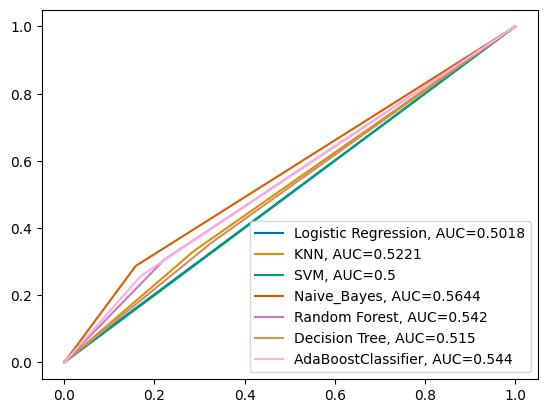

In [64]:
evaluating_classification_models(X1, y1)

In [65]:
hyperparameter_tuning(X1, y1)

0:00:01.807393


{GaussianNB(): {'var_smoothing': 1e-08},
 LogisticRegression(): {'solver': 'liblinear', 'C': 0.59},
 KNeighborsClassifier(): {'weights': 'uniform', 'n_neighbors': 4},
 DecisionTreeClassifier(): {'splitter': 'random',
  'min_samples_split': 2,
  'max_depth': 3,
  'criterion': 'log_loss'},
 RandomForestClassifier(): {'n_estimators': 50,
  'min_samples_split': 5,
  'max_depth': 7,
  'criterion': 'entropy'},
 AdaBoostClassifier(): {'n_estimators': 50, 'learning_rate': 2.0}}

                     f1_score
Naive_Bayes          0.093333
Decision Tree        0.122186
Random Forest        0.127090
SVM                  0.224138
KNN                  0.268657
Logistic Regression  0.322581
AdaBoostClassifier   0.561798


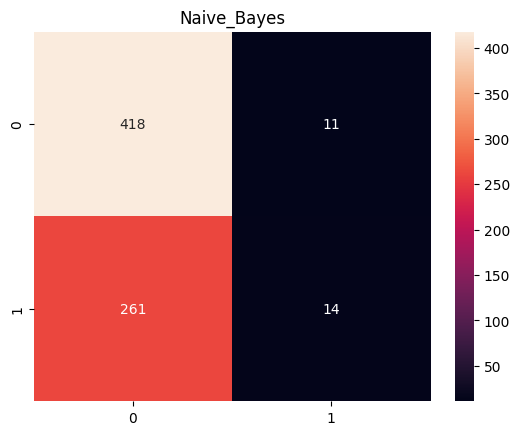

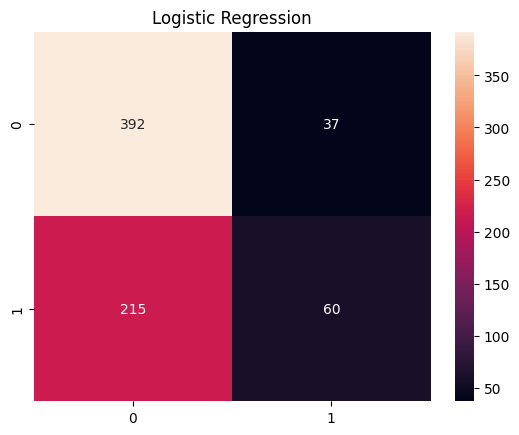

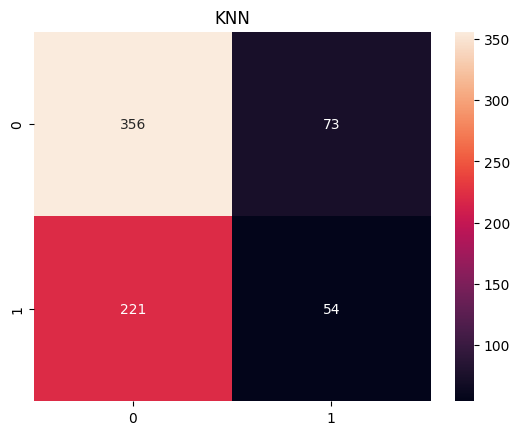

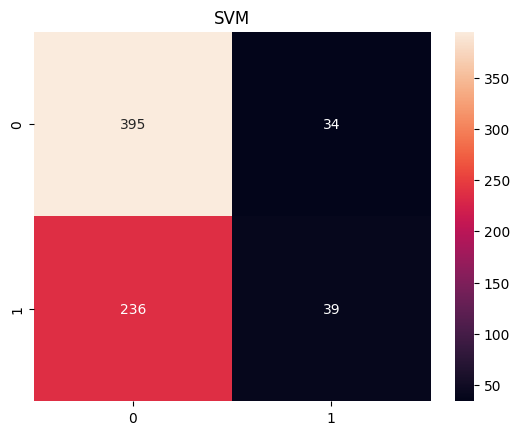

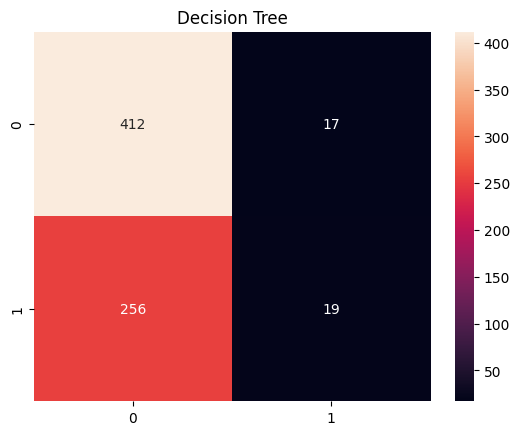

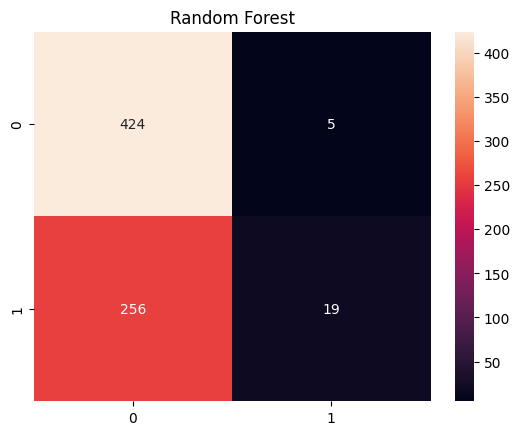

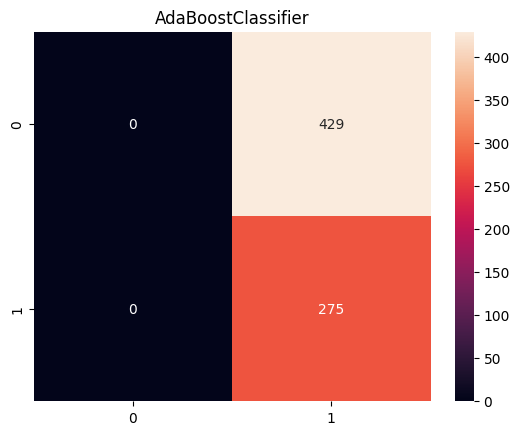

In [72]:
models1 = {"Naive_Bayes":naive_bayes.GaussianNB(var_smoothing = 1e-08),
           "Logistic Regression": LogisticRegression(solver = 'liblinear', C = 0.59),
          "KNN":neighbors.KNeighborsClassifier(weights = 'uniform',  n_neighbors = 4),
          "SVM":svm.SVC(kernel = 'linear',  C = 0.1),
          "Decision Tree": DecisionTreeClassifier(splitter = 'random', criterion = 'log_loss', max_depth = 3, min_samples_split = 2),
          "Random Forest": RandomForestClassifier(n_estimators = 50, criterion =  'entropy', max_depth = 7, min_samples_split = 5),
          "AdaBoostClassifier": AdaBoostClassifier(n_estimators = 50, learning_rate = 2.0)}
evaluating_classification_models_with_hyperpar(X1, y1, models1)

AdaBoostClassifier # Conclusions:
* Target - feature variable relationships: we did not found a statistically significant relationship between the 'Attrition' target feature and the other employee characteristics from data set. The higher correlation coefficient was beetwen 'Attrition' and StockOptionLevel - 0.086387;
* In order to predict whether or not an employee will quit their job the best classification model algorithm to use is Ada Boost Classifier with an f1 score of  0.561798.